# Analisis Iklan Game Toko 'Ice'

## Konten<a id='back'></a>

* [Pendahuluan](#intro)
* [Tahap 1. Inisialisasi data](#inisial)
* [Tahap 2. Mempersiapkan data data](#prepare)
* [Tahap 3. Manipulasi data](#manipulate)
* [Tahap 4. Menangani nilai hilang](#missing)
* [Tahap 5. Analisa Data](#analyze)
* [Tahap 6. Pemrofilan Pengguna](#profile)
* [Tahap 7. Hipotesis](#hypothesis)
* [Kesimpulan Umum](#conclusion)
    * [Temuan](#end)
    * [Rekomendasi](#recom)
    
    

## Pendahuluan<a id='intro'></a>
Kamu bekerja di toko online "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya, Xbox atau PlayStation), dan data historis penjualan game tersedia dari open source. Kamu perlu mengidentifikasi pola-pola yang menentukan apakah suatu game bisa dikatakan berhasil atau tidak. Dengan begitu, kamu bisa menemukan game yang paling potensial dan merencanakan kampanye iklannya.

Di depanmu ada data dari tahun 2016. Coba deh bayangkan bahwa sekarang adalah bulan Desember tahun 2016 dan kamu sedang merencanakan kampanye untuk tahun 2017. 

(Yang terpenting adalah untuk mendapatkan pengalaman dalam bekerja dengan data. Tidak masalah apakah kamu meramalkan penjualan tahun 2017 berdasarkan data dari tahun 2016 atau meramalkan penjualan tahun 2027 berdasarkan data dari tahun 2026.).

Dataset ini memuat singkatan ESRB. ESRB merupakan singkatan dari Entertainment Software Rating Board, yaitu sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.

Beberapa Hipotesis:
1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama. 

2. Rata-rata rating pengguna genre Action dan Sports berbeda.


## Inisialisasi data<a id='inisial'></a>

Memuat semua library yang dibutuhkan:

In [1]:
# Muat semua library
import pandas as pd # memproses dataframe
import numpy as np # memproses statistik deskriptif
import matplotlib.pyplot as plt # memvisualisasikan data
import seaborn as sns # memvisualisasikan data
import math as mt # menambahkan fungsi matematika
from scipy import stats as st # memproses hipotesis
from scipy.stats import ttest_ind
from scipy.stats import shapiro

# set tema seaborn
sns.set_theme(palette='bright')

### Memuat data

Memasukkan data yang dibutuhkan:

In [2]:
# Muat file data ke dalam DataFrame yang berbeda
games = pd.read_csv('/datasets/games.csv')

## Mempersiapkan Data<a id='prepare'></a>

Memeriksa informasi dalam data:

In [3]:
#Menampilkan informasi data
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Deskripsi data: 
* Name (nama) 
* Platform 
* Year_of_Release (tahun rilis) 
* Genre 
* NA_sales (penjualan di Amerika Utara dalam satuan juta USD) 
* EU_sales (penjualan di Eropa dalam satuan juta USD) 
* JP_sales (penjualan di Jepang dalam satuan juta USD) 
* Other_sales (penjualan di negara lainnya dalam satuan juta USD) 
* Critic_Score (skor ulasan dari kritikus, maksimal 100) 
* User_Score (skor ulasan dari pengguna, maksimal 10) 
* Rating (ESRB)

Kesimpulan:
* Jumlah keseluruhan data 16715
* data pada kolom `Name` ada yang hilang
* data pada kolom `Year_of_Release` ada yang hilang dan tipe data salah
* data pada kolom `Genre` ada yang hilang
* data pada kolom `Critic_Score` ada yang hilang
* data pada kolom `User_Score` ada yang hilang
* data pada kolom `Rating` ada yang hilang

In [4]:
# Tampilkan sampel data
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
#Memeriksa duplikat data
games.duplicated().sum()

0

Terlihat bahwa tidak ada data yang terduplikat sehingga tidak perlu ditangani lebih lanjut. Sebelum melakukan analisa lebih lanjut, lebih baik mengubah semua judul kolom menjadi huruf kecil.

In [6]:
#mengubah kolom menjadi kecil semua
games.columns = games.columns.str.lower()

#menampilkan data baru
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
#Memeriksa data yang hilang
games_missing = games.isnull().sum()
games_missing

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Seperti yang terlihat kita mengetahui ada beberapa nilai yang hilang pada data di kolom `year_of_release`, `critic_score`, `user_score`, dan `rating`

In [8]:
#Menampilkan data jumlah sample nilai yang hilang
games_missing_rows = games[games.isna().any(axis = 1)]
games_missing_rows.sample(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1392,Hannah Montana: Spotlight World Tour,Wii,2007.0,Action,0.87,0.38,0.00,0.13,NaN,NaN,NaN
14301,Let's Sing 2016,PS4,2015.0,Action,0.03,0.00,0.00,0.01,NaN,tbd,T
11575,The $1 Pyramid,Wii,2011.0,Misc,0.07,0.00,0.00,0.01,NaN,NaN,NaN
6024,DX Game of Life,PS,1996.0,Misc,0.00,0.00,0.27,0.02,NaN,NaN,NaN
6613,Evil Zone,PS,1998.0,Fighting,0.14,0.10,0.00,0.02,NaN,NaN,NaN
7491,Jikkyou Powerful Pro Yakyuu 2012,PS3,2012.0,Action,0.00,0.00,0.21,0.00,NaN,NaN,NaN
13041,Pinball Hall of Fame: The Gottlieb Collection,GC,2005.0,Misc,0.04,0.01,0.00,0.00,NaN,NaN,NaN
14028,Mr. Driller,PS,1999.0,Puzzle,0.02,0.01,0.00,0.00,NaN,NaN,NaN
8753,Cartoon Network Collection: Game Boy Advance V...,GBA,2005.0,Misc,0.11,0.04,0.00,0.00,NaN,NaN,NaN
14014,Da Capo I & II Plus Situation Portable,PSP,2010.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN


Terlihat bahwa data yang hilang tidak saling simetris sehingga diperlukan penanganan lebih lanjut.

## Manipulasi data<a id='manipulate'></a>

In [9]:
# Memanipulasi data yang tidak relevan.
games = games.loc[(games['year_of_release'].notna()) & (games['year_of_release'] >= 2000)]
games = games.reset_index(drop=True)

Disini kita akan menghapus data yang tidak relevan. Dikarenakan kita kan memulai dari tahun 2000 hingga tahun 2016. Pertama kita akan mengganti tipe data pada kolom `year_of_release`.

In [10]:
#Mengubah tipe data pada kolom year_of_release
games.dropna(subset=['year_of_release'], inplace=True)
games['year_of_release'] = games['year_of_release'].astype('int64')

In [11]:
#Memeriksa tipe data object pada kolom user_score
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
92,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
231,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
408,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
507,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
560,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
14450,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
14452,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
14453,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
14459,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


nilai tbd(to be determined) tidak relevan untuk user_score yang memiliki tipe nilai data float, sehingga diputuskan untuk menggantinya dengan`Nan` dan mengganti tipe datanya menjadi float

In [12]:
#Mengubah tipe data kolom user_score
games['user_score'].replace('tbd', np.nan, inplace=True)
games['user_score'] = games['user_score'].astype('float64')*10

untuk mempermudah analisa data, diputuskan untuk menambahkan kolom `total_sales`

In [13]:
#Menjumlahkan penjualan pada setiap wilayah untuk setiap game
games['total_sales'] = games[['na_sales', 'eu_sales','jp_sales','other_sales']].sum(axis=1)

In [14]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
14465,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
14466,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
14467,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
14468,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


terlihat bahwa penambahan kolom `total_sales` telah dilakukan

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14470 entries, 0 to 14469
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  int64  
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   critic_score     7887 non-null   float64
 9   user_score       7371 non-null   float64
 10  rating           9663 non-null   object 
 11  total_sales      14470 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.4+ MB


**Kesimpulan:**
1. Telah dikurangi data dibawah tahun 2000 karna dianggap tidak lagi relevan.
2. mengubah tipe data kolom `year_of_release` menjadi `int64` untuk mempermudah analisa karna data tersebut hanya diisi data tahun.
3. mengubah nilai `tbd` pada kolom `user_score` menjadi `Nan` karna nilai data pada kolom tersebut berupa angka dan mengganti tipe datanya menjadi `float64` untuk mempermudah proses selanjutnya.
4. penambahan kolom `total_sales` untuk mempermudah analisa.

Penanganan selanjutnya adalah untuk mengisi data pada kolom-kolom yang hilang `critic_score`, `user_score` dan `rating`

## Menangani nilai hilang <a id='missing'></a>

In [16]:
#Menampilkan data jumlah sample nilai yang hilang
games_missing_rows = games[games.isna().any(axis = 1)]
games_missing_rows.sample(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9579,Edna & Harvey: Harvey's New Eyes,PC,2011,Adventure,0.00,0.07,0.00,0.01,NaN,NaN,NaN,0.08
8066,Football Manager 2012,PSP,2011,Sports,0.00,0.09,0.00,0.04,NaN,NaN,NaN,0.13
13458,Style Book: Junior City,DS,2006,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
3482,FIFA 15,3DS,2014,Sports,0.09,0.34,0.00,0.03,NaN,24.0,E,0.46
5115,Q-Ball: Billiards Master,PS2,2000,Sports,0.13,0.10,0.00,0.04,65.0,NaN,E,0.27
3527,Hot Wheels: Stunt Track Challenge,GBA,2004,Racing,0.32,0.12,0.00,0.01,NaN,NaN,E,0.45
9797,Pocket Dogs,GBA,2004,Misc,0.06,0.02,0.00,0.00,NaN,NaN,NaN,0.08
1608,Excitebike 64,N64,2000,Racing,0.65,0.15,0.19,0.01,NaN,NaN,NaN,1.00
14113,Lumo,PSV,2016,Puzzle,0.00,0.01,0.00,0.00,NaN,NaN,E10+,0.01
14435,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01


seperti yang terihat data tidak simetris sehingga diperlukan analisa perkolom

In [17]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
5,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E,28.32
6,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
7,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,86.0,E,23.21
8,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,77.0,E,22.70
9,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,63.0,E,21.82


disini terlihat bahwa data pada `critic_score` dan `user_score` merupakan data kuantitatif, sedangkan `rating` memiliki data kualitatif. Penanganan untuk data kuantitatif akan diputuskan menggunakan `mean` dan `median` sedangkan untuk data kualitatif akan diputuskan untuk analisa data lebih lanjut atau mungkin dapat dibiarkan jika tidak mempengaruhi analisa.

### Critic Score

In [18]:
#menampilkan 'critic_score' yang nilainya hilang
games.loc[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
14,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
17,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN,15.84
19,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
22,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...
14465,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
14466,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
14467,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
14468,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [19]:
#Memeriksa mean dan median
print(f"Rata-rata critic_sore\t: {games['critic_score'].mean():.1f}")
print(f"Median critic_score\t: {games['critic_score'].median()}")

Rata-rata critic_sore	: 68.9
Median critic_score	: 71.0


diputuskan untuk menggunakan median, untuk mengurangi pengaruhnya terhadap data

In [20]:
#menggantikan nilai hilang dengan median
median_critic = games['critic_score'].median()
games['critic_score'].fillna(value=median_critic, inplace=True)

In [21]:
games['critic_score'].isnull().sum()

0

dapat dipastikan saat ini kolom `critic_score` sudah tidak memiliki nilai yang hilang

In [22]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
14465,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,NaN,NaN,0.01
14466,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,NaN,NaN,0.01
14467,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,NaN,NaN,0.01
14468,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,NaN,NaN,0.01


nilai median telah mengisi data yang hilang pada kolom `critic_score`

### User Score

In [23]:
#menampilkan nilai hilang pada kolom `user_score`
games.loc[games['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71.0,NaN,NaN,24.67
14,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,71.0,NaN,NaN,18.24
17,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,71.0,NaN,NaN,15.84
19,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,71.0,NaN,NaN,15.13
22,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,NaN,NaN,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...
14465,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,NaN,NaN,0.01
14466,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,NaN,NaN,0.01
14467,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,NaN,NaN,0.01
14468,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,NaN,NaN,0.01


In [24]:
#Memeriksa mean dan median
print(f"Rata-rata user_score\t: {games['user_score'].mean():.1f}")
print(f"Median user_score\t: {games['user_score'].median()}")

Rata-rata user_score	: 71.1
Median user_score	: 75.0


diputuskan untuk menggunakan median, untuk mengurangi pengaruhnya terhadap data

In [25]:
#mengganti nilai hilang dengan median
median_user = games['user_score'].median()
games['user_score'].fillna(value=median_user, inplace=True)

In [26]:
games['user_score'].isnull().sum()

0

dapat dipastikan saat ini kolom `user_score` sudah tidak memiliki nilai yang hilang

In [27]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
14465,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,75.0,NaN,0.01
14466,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,75.0,NaN,0.01
14467,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,75.0,NaN,0.01
14468,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,75.0,NaN,0.01


nilai median sudah mengisi nilai hilang pada kolom `user_score`

### Rating

In [28]:
games.loc[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71.0,75.0,NaN,24.67
14,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,71.0,75.0,NaN,18.24
17,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,71.0,75.0,NaN,15.84
19,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,71.0,75.0,NaN,15.13
22,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,75.0,NaN,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...
14465,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,75.0,NaN,0.01
14466,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,75.0,NaN,0.01
14467,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,75.0,NaN,0.01
14468,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,75.0,NaN,0.01


memastikan nilai apa saja yang yang terdapat di kolom `rating`

In [29]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [30]:
rating_counts = games['rating'].value_counts(dropna=False)
rating_counts

NaN     4807
E       3881
T       2859
M       1521
E10+    1392
EC         8
AO         1
RP         1
Name: rating, dtype: int64

Kemungkinan rating akan berhubungan dengan `genre` dan `platform` diputuskan untuk memastikan hubungan 2 variabel tersebut dengan `rating`

In [31]:
rating_genre = games.groupby('genre')['rating'].value_counts(dropna=False)
rating_genre

genre     rating
Action    NaN       949
          T         662
          M         589
          E10+      468
          E         409
                   ... 
Strategy  T         156
          E10+       76
          E          63
          M          25
          RP          1
Name: rating, Length: 64, dtype: int64

terlihat bahwa sangat sulit dianalisa hubungannya sehingga diputuskan untuk melanjutkan ke tahap berikutnya

In [32]:
platform_genre = games.groupby('platform')['rating'].value_counts(dropna=False)
platform_genre

platform  rating
3DS       NaN       289
          E          90
          E10+       74
          T          47
          M          12
                   ... 
XOne      M          70
          NaN        61
          E          45
          T          40
          E10+       31
Name: rating, Length: 93, dtype: int64

terlihat bahwa sangat sulit dianalisa hubungannya sehingga diputuskan untuk melanjutkan ke tahap berikutnya. dan mengabaikan nilai kosong pada kolom rating karna dirasa tidak akan terlalu mempengaruhi analisa

In [33]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14470 entries, 0 to 14469
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  int64  
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   critic_score     14470 non-null  float64
 9   user_score       14470 non-null  float64
 10  rating           9663 non-null   object 
 11  total_sales      14470 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.4+ MB


**Kesimpulan:**
1. data pada kolom `user_score` dan `critic_score` telah digantikan dengan nilai median
2. data pada kolom `rating` diputuskan untuk diabaikan karna sulit untuk mengetahui variabel yang mempengaruhi dan dirasa tidak mempengaruhi analisa selanjutnya

selanjutnya akan dilakukan analisa terhadap data karna data sudah bersih dan bisa dianalisa

## Analisa Data<a id='analyze'></a>

### Analisa peluncuran game pertahun

Sebelumnya kita sudah memotong data sehingga data yang digunakan hanya setelah tahun 2000, untuk melihat berapa banyak game yang diluncurkan setiap tahunnya dari tahun 2000-2016 diperlukan visualisasi data.

In [34]:
# menghitung jumlah game yang diluncurkan di tahun yang berbeda
game_year_count = pd.pivot_table(games, index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()
game_year_count

,year_of_release,name
0,2000,350
1,2001,482
2,2002,829
3,2003,775
4,2004,762
5,2005,939
6,2006,1006
7,2007,1197
8,2008,1427
9,2009,1426


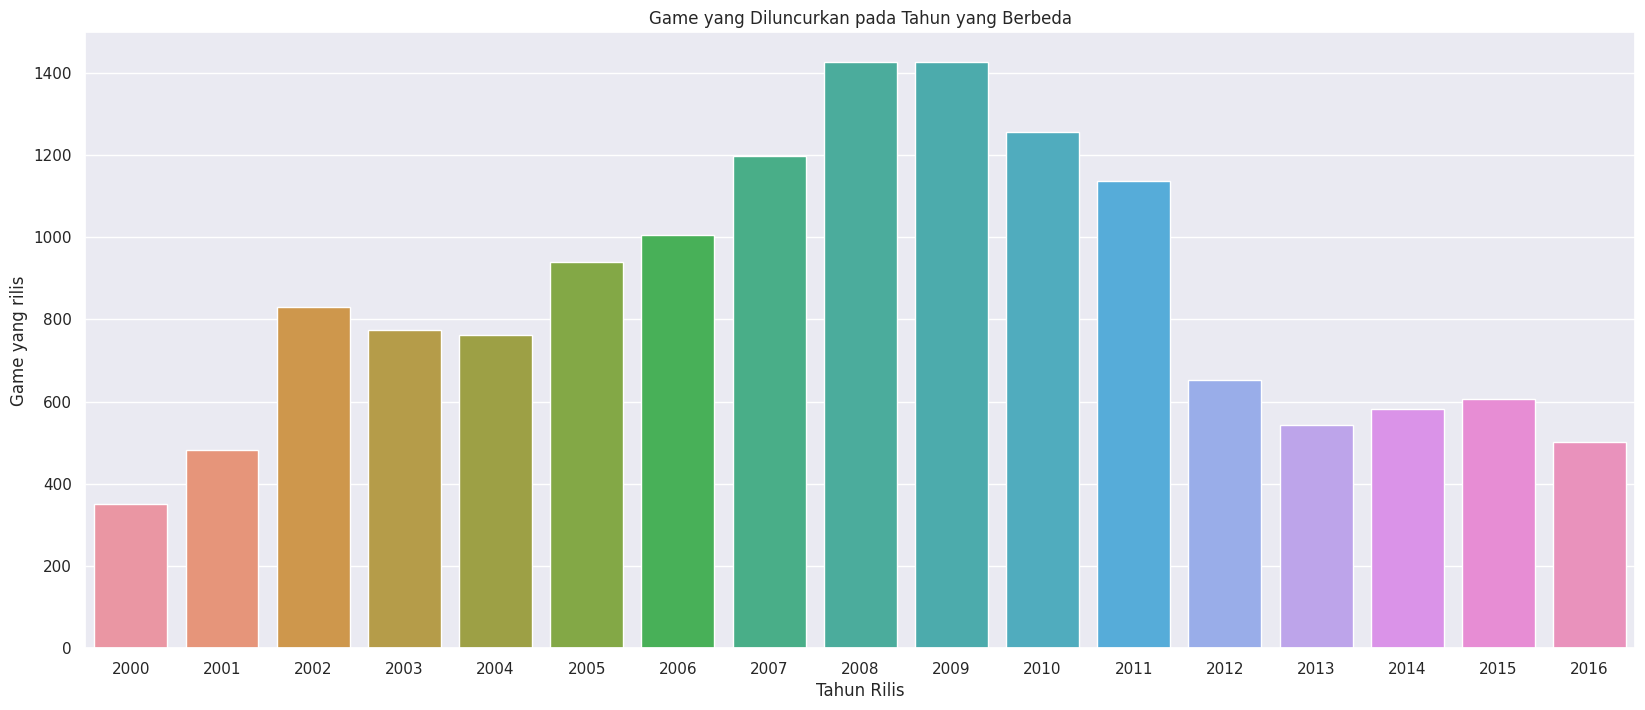

In [35]:
plt.figure(figsize = (20,8))
sns.barplot(data=game_year_count, x = 'year_of_release', y = 'name')
plt.title('Game yang Diluncurkan pada Tahun yang Berbeda')
plt.xlabel('Tahun Rilis')
plt.ylabel('Game yang rilis')
plt.show()

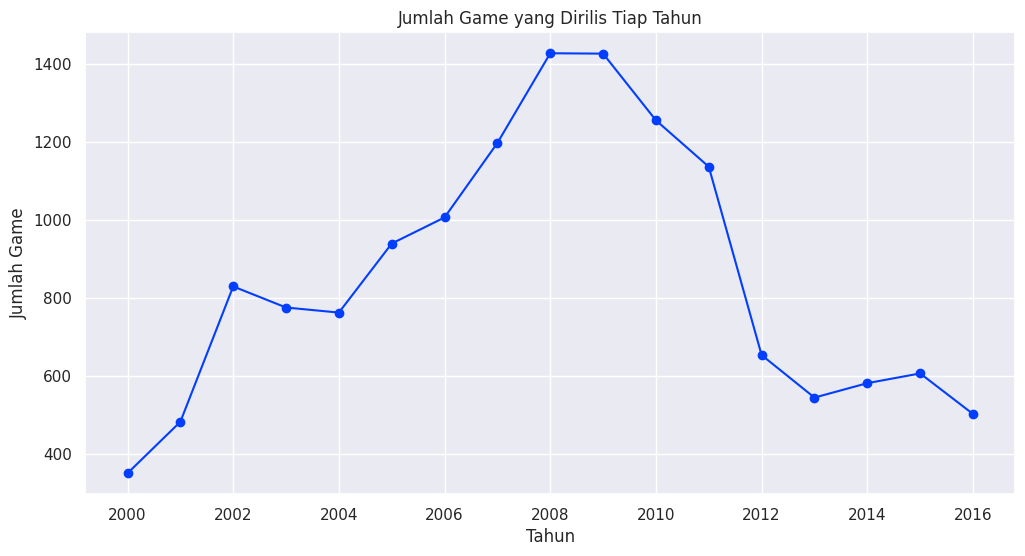

In [36]:
# Mengambil data jumlah game yang dirilis tiap tahun
year = games['year_of_release'].value_counts().sort_index().index
games_count = games['year_of_release'].value_counts().sort_index().values

# Membuat grafik garis
plt.figure(figsize=(12, 6))
plt.plot(year, games_count, marker='o', linestyle='-')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Game yang Dirilis Tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Game')

# Menampilkan grid
plt.grid(True)

# Menampilkan grafik
plt.show()

terlihat bahwa perilisan terbanyak terdapat pada tahun 2008 dan 2009 dan paling rendah pada tahun 2000, kemungkinan ini dikarenakan dengan maraknya penggunakan komputer sehingga setiap platform game mulai merilis game yang bisa diakses memnggunakan komputer. akan tetapi terjadi penurunan setelah tahun tersebut, kemungkinan ini dikarenakan `hype` dari game tersebut dan kurangnya inovasi dari tiap game sehingga peminatnya mulai berkurang dan perilisannya dikurangi, atau karena ada beberapa `platform` yang lebih digandrungi sehingga popularitas platform lain menjadi rendah dan mengurangi produksi game platform lain.

### Penjualan bervariasi dari satu platform ke platform lainnya

dari data sebelumnya kita megetahui bahwa terjadi penurunan perilisan game setelah tahun 2009, salah satu kemungkinannya adalah dikarenakan popularitas salah satu `platform` yang melebihi `platform` lainnya, popularitas tersebut dapat dianalisa berdasarkan penjualan dari game pertahun per platform

Memilih platform dengan total penjualan nya tinggi dan membuat distribusinya berdasarkan data pertahun. Step pertama ialah mencari platform yang terpopuler, lalu mencari berapa lama biasanya waktu yang dibutuhkan platform baru untuk muncul dan untuk platform lama untuk memudar popularitasnya?

Lalu melihat bagaimana penjualan bervariasi dari satu platform ke platform lainnya. Pilih platform dengan total penjualan terbesar dan buat distribusinya berdasarkan data per tahun.

In [37]:
#Menjumlahkan jumlah popularitas untuk semua game
games_lifetime = pd.pivot_table(data = games, index = 'year_of_release', values = 'total_sales', columns = 'platform', aggfunc = 'sum').fillna(0)
games_lifetime

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2000,0.00,5.99,0.00,19.76,0.07,0.00,33.97,4.66,96.37,39.17,0.00,0.00,0.00,0.00,0.68,0.00,0.00,0.00,0.99,0.00
2001,0.00,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,22.26,0.00
2002,0.00,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.01,0.00
2003,0.00,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.04,0.00
2004,0.00,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.00,0.00,7.06,0.00,0.00,0.00,0.00,0.00,65.42,0.00
2005,0.00,0.00,130.14,0.00,33.86,27.62,0.00,4.37,0.00,160.66,0.00,0.00,43.84,0.00,0.00,0.00,0.00,8.25,49.08,0.00
2006,0.00,0.00,119.81,0.00,5.28,11.26,0.00,2.85,0.00,103.42,20.96,0.00,55.32,0.00,0.00,137.15,0.00,51.62,10.04,0.00
2007,0.00,0.02,146.94,0.00,3.40,0.27,0.00,9.28,0.00,75.99,73.19,0.00,46.93,0.00,0.00,152.77,0.00,95.41,0.55,0.00
2008,0.00,0.04,145.31,0.00,0.00,0.00,0.00,12.42,0.00,53.90,118.52,0.00,34.55,0.00,0.00,171.32,0.00,135.26,0.18,0.00


disini dapat terlihat beberapa game ada yang mengalami penjualan yang cukup tinggi lalu kemudian berkurang dan lama-kelamaan tidak memiliki penjualan lagi, contohnya pada `Wii`, `DS` dan `X30`.

<AxesSubplot:xlabel='platform'>

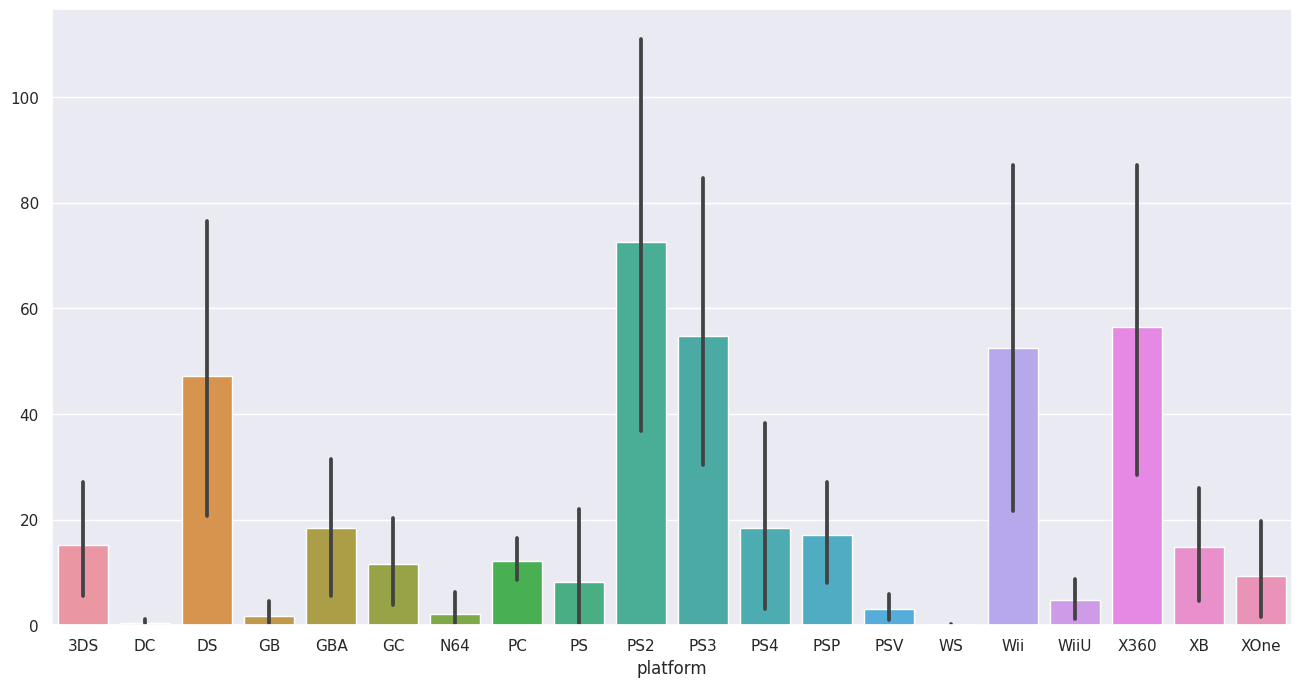

In [38]:
plt.figure(figsize = (16,8))
sns.barplot(data=games_lifetime)

terlihat bahwa ada beberapa `platform` yang lebih populer dibandingkan yang lain diantaranya `PS2`, `Wii`, `X360`, `PS3` dan `DS`, akan tetapi telah terlihat sebelumnya bahwa penjualan platform `Wii`, `DS` dan `X360` sebelumnya mengalami penurunan significant yang bahkan sampai tidak adanya penjualan. untuk itu perlu dianalisa lagib berapa lama biasanya waktu yang dibutuhkan platform baru untuk muncul dan platform lama untuk memudar popularitasnya?

<AxesSubplot:xlabel='year_of_release'>

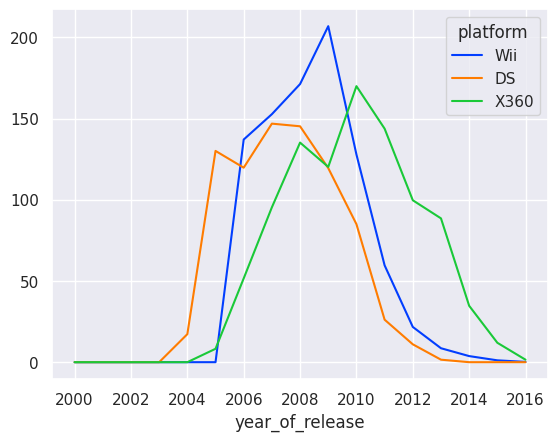

In [39]:
#Membuat lineplot untuk menampilkan 3 sample yang dipilih
games_lifetime[['Wii', 'DS', 'X360']].plot()

dapat dilihat bahwa puncak penjualannya terjadi pada tahun 2006-2010 lalu menurun secara significant sampai tidak adanya penjualan.

**Kesimpulan:**
Game kemungkinan dapat bertahan selama 4 tahun sebelum popularitasnya menurun.

**PLATFORM DENGAN PENJUALAN TERTINGGI**

In [40]:
games['platform'].value_counts()

PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PC       917
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
PS       274
XOne     247
WiiU     147
N64       70
DC        31
GB        27
WS         4
Name: platform, dtype: int64

In [41]:
# Menghitung total penjualan untuk setiap platform
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()

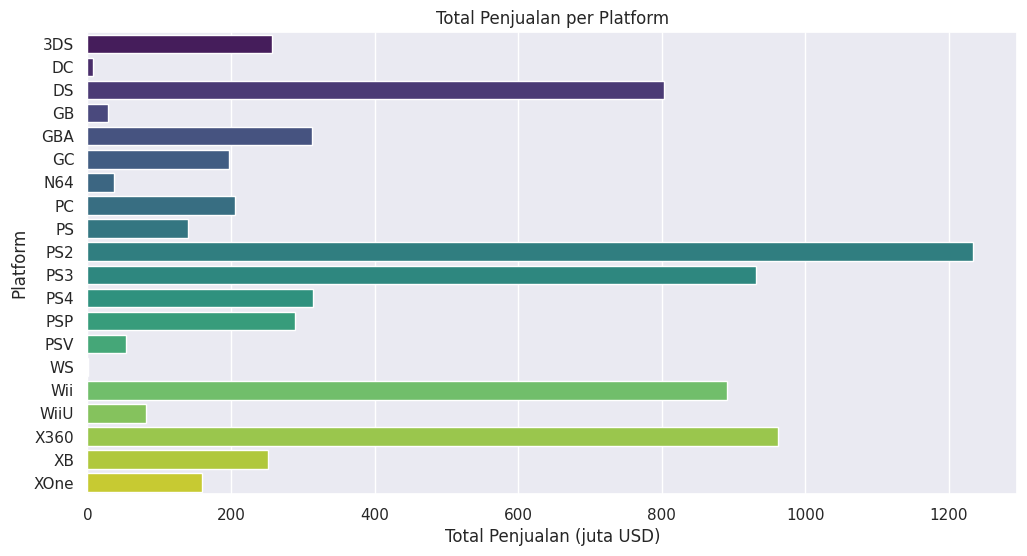

In [42]:
# Membuat bar plot visualisasi penjualan untuk platform
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='platform', data=platform_sales, palette='viridis')
plt.title('Total Penjualan per Platform')
plt.xlabel('Total Penjualan (juta USD)')
plt.ylabel('Platform')
plt.show()

dapat dilihat bahwa platform dengan penjualan tertinggi adalah `PS2`, `DS`, `PS3`, `Wii`, dan `X360`.

In [43]:
# Menemukan platform dengan total penjualan terbesar
high_platform_sales = platform_sales[platform_sales['total_sales'] == platform_sales['total_sales'].max()]
print("Platform dengan Total Penjualan Terbesar :")
high_platform_sales

Platform dengan Total Penjualan Terbesar :


,platform,total_sales
9,PS2,1233.56


In [44]:
# Memilih data penjualan hanya untuk platform terbesar
high_platform_sales = games[games['platform'] == high_platform_sales['platform'].values[0]]

# Membuat distribusi penjualan per tahun
sales_platform_per_year = high_platform_sales.groupby('year_of_release')['total_sales'].sum()

# Menampilkan distribusi penjualan
print("Distribusi Penjualan Per Tahun Untuk Platform Terbesar:")
sales_platform_per_year


Distribusi Penjualan Per Tahun Untuk Platform Terbesar:


year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64

dilihat dari tabel penjualan tertinggi terjadi pada tahun 2004, lalu mengalami penurunan bertahap hingga tahun 2011 hanya 0.45 juta USD.

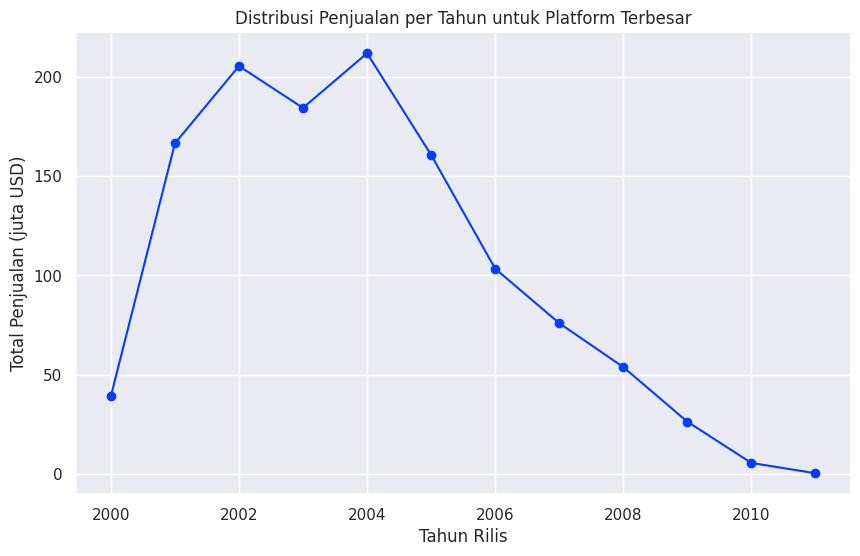

In [45]:
# Data distribusi penjualan per tahun
year = sales_platform_per_year.index
sales = sales_platform_per_year.values

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(year, sales, marker='o', linestyle='-')
plt.title('Distribusi Penjualan per Tahun untuk Platform Terbesar')
plt.xlabel('Tahun Rilis')
plt.ylabel('Total Penjualan (juta USD)')
plt.grid(True)
plt.show()

dilihat dari tabel kemungkinan untuk sebuah game baru mencapai puncak popularitasnya adalah 2-4 tahun

**Kesimpulan:**
1. popularitas platform mempengaruhi penjualannya
2. platform yang dulunya populer ada kemungkinan untuk meredup
3. umumnya platform baru mencapai puncak popularitasnya adalah 2-4 tahun
4. setelah 4 tahun kemungkinan penjualannya akan menurun, dan akan menghilang sekitar 6 tahun kemudian.

### Menentukan periode waktu pengambilan data

membangun model untuk tahun 2017

In [46]:
# Mengambil sample data dari games
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2619,Start the Party!,PS3,2010,Misc,0.07,0.41,0.00,0.13,71.0,75.0,NaN,0.61
1052,Anno 2070,PC,2011,Strategy,0.00,1.13,0.00,0.29,83.0,70.0,T,1.42
11654,Gravity Falls: Legend of the Gnome Gemulets,3DS,2015,Action,0.03,0.00,0.00,0.00,46.0,58.0,E,0.03
2288,Godzilla: Destroy All Monsters Melee,GC,2002,Fighting,0.55,0.14,0.00,0.02,73.0,78.0,T,0.71
3014,Over the Hedge,PS2,2006,Platform,0.45,0.02,0.00,0.07,58.0,86.0,E10+,0.54
5484,Don King Presents: Prizefighter,X360,2008,Sports,0.14,0.08,0.00,0.02,56.0,64.0,T,0.24
8211,Macross Triangle Frontier,PSP,2011,Action,0.00,0.00,0.12,0.00,71.0,75.0,NaN,0.12
5367,Army of Two: The Devil's Cartel,X360,2013,Shooter,0.16,0.07,0.00,0.02,54.0,62.0,M,0.25
12152,Detective Conan: Phantom Rhapsody,3DS,2014,Action,0.00,0.00,0.03,0.00,71.0,75.0,NaN,0.03
8306,Cruis'n,Wii,2007,Racing,0.10,0.01,0.00,0.01,25.0,37.0,E,0.12


Pada kasus ini tahap pertama yang dilakukan ialah memfilter kembali datanya. Mengambil data 5 tahun ke belakang. Maksimal yang didapat dari data yang sedang dikerjakan yaitu tahun 2016 yang berarti data yang akan diambil adalah data yang cukup relevan untuk mendukung tersebut yaitu memulai mengambil data dari tahun 2011.

In [47]:
# Membuat data yang mulai dari tahun 2011
games_2011 = games[games['year_of_release'] >= 2011].reset_index(drop=True)

In [48]:
#menampilkan data dari tahun 2011
games_2011

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,34.0,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,75.0,NaN,14.63
4,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,71.0,75.0,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,75.0,NaN,0.01
4018,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,71.0,75.0,NaN,0.01
4019,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,75.0,NaN,0.01
4020,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,75.0,NaN,0.01


sekarang data dianggap sudah cukup relevan untuk membangun model tahun 2017 dan melanjutkan rancangan.

In [49]:
# Menghitung total penjualan untuk setiap platform dari tahun 2011
sales_platform_2011 = games_2011.groupby('platform')['total_sales'].sum().reset_index()

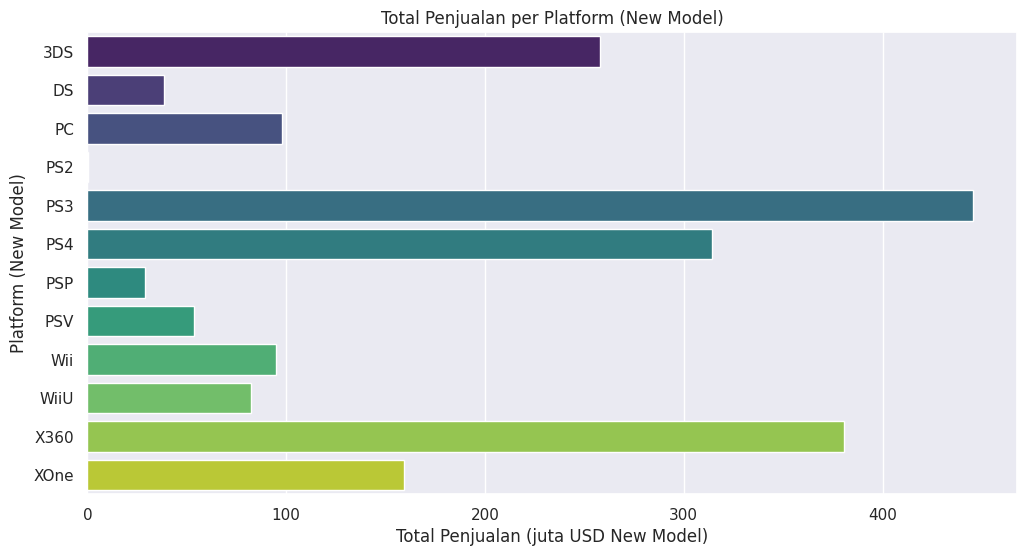

In [50]:
# Membuat bar plot visualisasi penjualan untuk platform
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='platform', data=sales_platform_2011, palette='viridis')
plt.title("Total Penjualan per Platform (New Model)")
plt.xlabel('Total Penjualan (juta USD New Model)')
plt.ylabel('Platform (New Model)')
plt.show()

terlihat bahwa platform `PS3` memiliki penjualan paling banyak diantara platform lainnya dilanjutkan dengan `X360`, `PS4`, `3DS` dan `DC`.

### Mendistribusikan penjualan platform PS3

In [51]:
# Menemukan platform dengan total penjualan terbesar
high_sales_platform_2011 = sales_platform_2011[sales_platform_2011['total_sales'] == sales_platform_2011['total_sales'].max()]
print("Platform dengan total penjualan terbesar(New Model) :")
high_sales_platform_2011

Platform dengan total penjualan terbesar(New Model) :


,platform,total_sales
4,PS3,445.57


seperti yang sudah diketahui sebelumnya penjualan terbesar adalah `PS3`

In [52]:
# Membuat distribusi platform terbesar untuk data new model
# Memilih data penjualan untuk platform terbesar
high_sales_platform_data_2011 = games_2011[games_2011['platform'] == high_sales_platform_2011 ['platform'].values[0]]

# Membuat distribusi penjualan per tahun
sales_platform_per_year_2011 = high_sales_platform_data_2011.groupby('year_of_release')['total_sales'].sum()

# Menampilkan distribusi penjualan
print("Distribusi penjualan per tahun untuk platform terbesar (New Model):")
sales_platform_per_year_2011


Distribusi penjualan per tahun untuk platform terbesar (New Model):


year_of_release
2011    156.78
2012    107.36
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: total_sales, dtype: float64

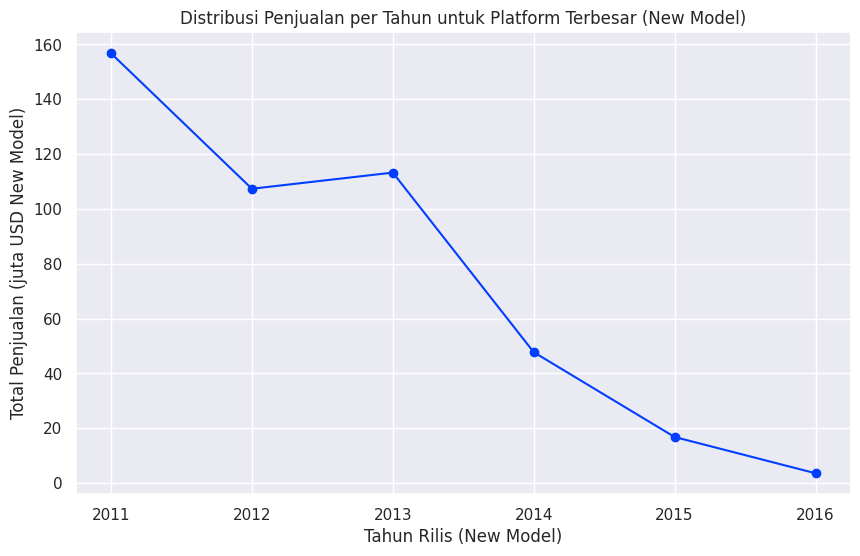

In [53]:
# Data distribusi penjualan per tahun
year_2011 = sales_platform_per_year_2011.index
sales_2011 = sales_platform_per_year_2011.values

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(year_2011, sales_2011, marker='o', linestyle='-')
plt.title('Distribusi Penjualan per Tahun untuk Platform Terbesar (New Model)')
plt.xlabel('Tahun Rilis (New Model)')
plt.ylabel('Total Penjualan (juta USD New Model)')
plt.grid(True)
plt.show()


dapat dilihat bahwa penjualan tetringgi untuk `PS3` adalah pada tahun 2011 kemudian semakin menyusut hingga tahun 2016

untuk melihat distribusi penjualan setelah tahun 2011  maka akan dibuatkan tabel distribusi penjualan

In [54]:
# Menjumlahkan jumlah total penjualan untuk semua game (new model)
games_data_lifetime_2011 = pd.pivot_table(games_2011, index = 'year_of_release', values = 'total_sales', columns = 'platform', aggfunc = 'sum').fillna(0)
games_data_lifetime_2011

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,63.20,26.18,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00
2012,51.36,11.01,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,0.00,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,0.00,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


sebelumnya telah diketahui bahwa platform dengan penjualan terbesar pada periode waktu di atas tahun 2011 adalah `PS3`, `PS4`, `X360`, `3DS`, dan `DC`. akan tetapi dilihat dari pola sebelumnya diketahui bahwa popularitas game pada tahun selanjutnya dipengaruhi oleh pendapatan tahun sebelumnya. dilihat dari tabel platform yang kemungkinan masih memiliki cukup banyak penggemar pada tahun selanjutnya adalah `PS4`, `XOne`, dan `3DS`. dikarenakan hal itu maka diputuskan untuk memilih analisa lebih lanjut pada platform `PS3`, `PS4`, `X360`, `XOne` dan `3DS` untuk mengetahui distribusi penjualan dan potensi untuk tahun selanjutnya.

<AxesSubplot:xlabel='year_of_release'>

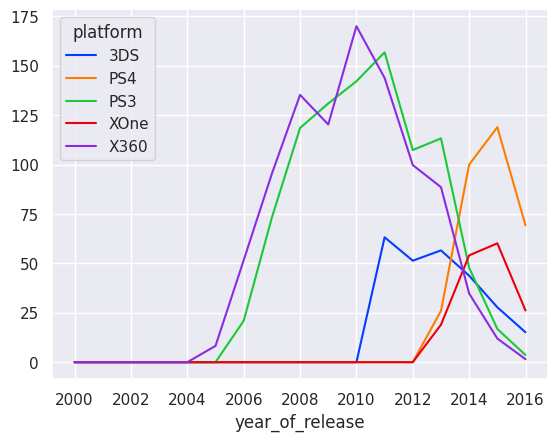

In [55]:
# Menampilkan total penjualan beberapa platform yang memiliki potensi populer

games_lifetime[['3DS', 'PS4', 'PS3', 'XOne', 'X360']].plot()

dapat dilihat bahwa saat kepopuleran `PS3` mulai menurun popularitas `PS4` mulai melesat naik, begitu pula dengan `X360` yang mulai menyusut lalu `XOne` mulai populer meskipun popularitasnya belum menyaingi popularitas `X360` sebelumnya kemungkinan ini dikarenakan kualitas `XOne` masih belum bisa menyaingi pendahulunya. bisa dikatakan bahwa  `PS4` dan `XOne` adalah versi upgrade dari `PS3` dan `X360` yang sebelumnya sudah mulai menyusut pendapatannya.

### Membuat Boxplot untuk Penjualan Global Semua Game yang Dikelompokan Berdasarkan Platform

Buat sebuah boxplot untuk penjualan global semua game yang dikelompokkan berdasarkan platform. Apakah perbedaan penjualannya signifikan? Bagaimana dengan penjualan rata-rata pada berbagai platform?

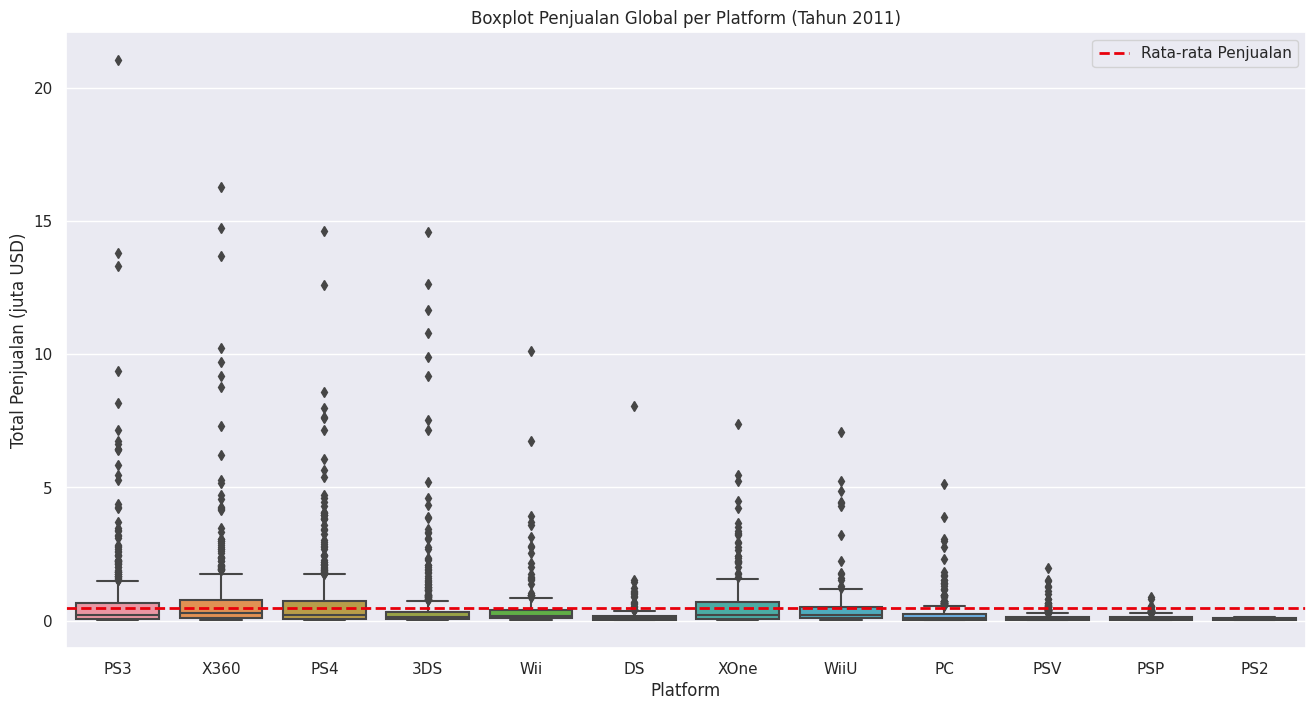

In [56]:
# membuat boxplot dengan rata-rata
plt.figure(figsize=(16, 8))
sns.boxplot(data=games_2011, x='platform', y='total_sales')
plt.title('Boxplot Penjualan Global per Platform (Tahun 2011)')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan (juta USD)')

# Menambahkan garis rata-rata untuk setiap platform
plt.axhline(games_2011['total_sales'].mean(), color='r', linestyle='dashed', linewidth=2, label='Rata-rata Penjualan')
plt.legend()

plt.show()

In [57]:
games.groupby('platform').agg({'total_sales' : ['mean','median','max','min']}).reset_index()

platform total_sales                    
                   mean median    max   min
0       3DS    0.503535  0.120  14.60  0.01
1        DC    0.239032  0.120   1.81  0.02
2        DS    0.378660  0.110  29.80  0.01
3        GB    1.074074  0.810   6.39  0.07
4       GBA    0.385795  0.160  15.84  0.01
5        GC    0.362970  0.150   7.06  0.01
6       N64    0.532857  0.220   3.36  0.01
7        PC    0.224340  0.040   8.01  0.01
8        PS    0.513504  0.245   5.31  0.01
9       PS2    0.579953  0.230  20.81  0.00
10      PS3    0.713124  0.280  21.05  0.00
11      PS4    0.801378  0.200  14.63  0.01
12      PSP    0.242691  0.090   7.68  0.01
13      PSV    0.125431  0.050   1.96  0.01
14       WS    0.240000  0.210   0.51  0.03
15      Wii    0.692986  0.190  82.54  0.01
16     WiiU    0.559116  0.220   7.09  0.01
17     X360    0.780227  0.280  21.82  0.01
18       XB    0.313288  0.150   8.48  0.01
19     XOne    0.645020  0.220   7.39  0.01

dilihat dari boxplot yang memiliki nilai diatas garis merah adalah `PS3`, `PS4`, `X360` dan `XOne`. kemungkinan platform ini masih memiliki penggemar yang cukup banyak untuk tetap berkembang pada tahun selanjutnya.

### Melihat Ulasan Pengguna dan Para Profesional

In [58]:
# Mengiris hanya untuk ps4 untuk critic_score & user_score dengan nilai non null
# Mengiris hanya untuk PS4 untuk critic_score & user_score dengan nilai non-null
games_data_ps4_2011 = games_2011.groupby(['platform', 'name']).agg({
    'total_sales': 'sum',
    'critic_score': 'sum',
    'user_score': 'sum'
}).query('platform == "PS4" & critic_score > 0 & user_score > 0').reset_index()
games_data_ps4_2011

,platform,name,total_sales,critic_score,user_score
0,PS4,7 Days to Die,0.14,45.0,59.0
1,PS4,Adventure Time: Finn & Jake Investigations,0.10,71.0,75.0
2,PS4,Aegis of Earth: Protonovus Assault,0.02,57.0,78.0
3,PS4,Agatha Christie's The ABC Murders,0.02,67.0,62.0
4,PS4,Akiba's Trip: Undead & Undressed,0.11,71.0,75.0
...,...,...,...,...,...
387,PS4,Yakuza: Ishin,0.15,71.0,75.0
388,PS4,Yoru no Nai Kuni,0.08,71.0,75.0
389,PS4,ZombiU,0.06,71.0,75.0
390,PS4,Zombie Army Trilogy,0.20,62.0,68.0


In [59]:
# Membuat korelasi untuk platform PS4 dengan total_sales
games_data_ps4_2011.corr()['total_sales']

total_sales     1.000000
critic_score    0.338706
user_score     -0.062756
Name: total_sales, dtype: float64

Korelasi antara `total_sales` dan `critic_score` adalah sekitar `0.338`, yang berarti ada hubungan positif antara keduanya. Ini menunjukkan bahwa ada kecenderungan bahwa game dengan skor kritikus yang lebih tinggi cenderung memiliki total penjualan yang lebih tinggi. Namun, nilai korelasinya tidak sangat tinggi, kemungkinan karna ada faktor lain yang ikut mempengaruhi penjualan selain `critic_score`

Korelasi antara `total_sales` dan `user_score` (skor pengguna) adalah sekitar `-0.06`, yang  menunjukkan hubungan negatif antara keduanya akan tetapi sangat kecil. Artinya, skor pengguna tidak terlalu berpengaruh terhadap penjualan.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

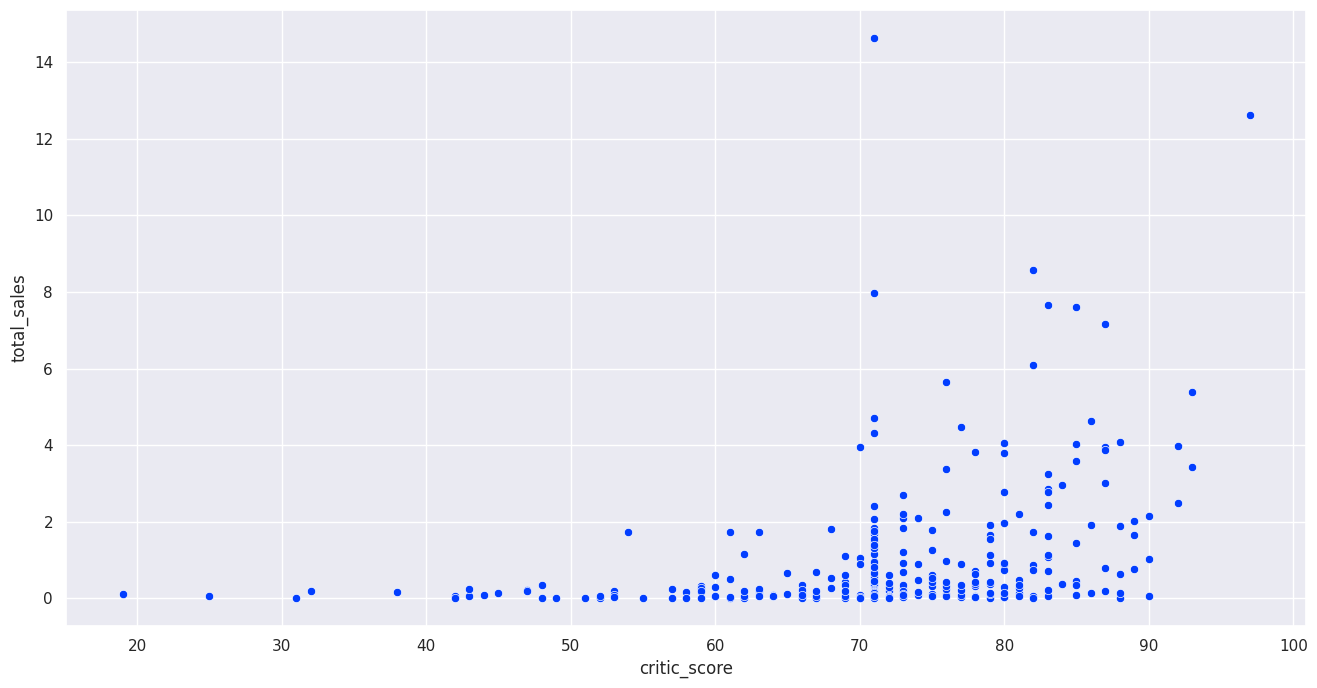

In [60]:
# Membuat scatterplot untuk masing-masing yang ditentukan
plt.figure(figsize = (16, 8))
sns.scatterplot(data=games_data_ps4_2011, x = 'critic_score', y='total_sales' )

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

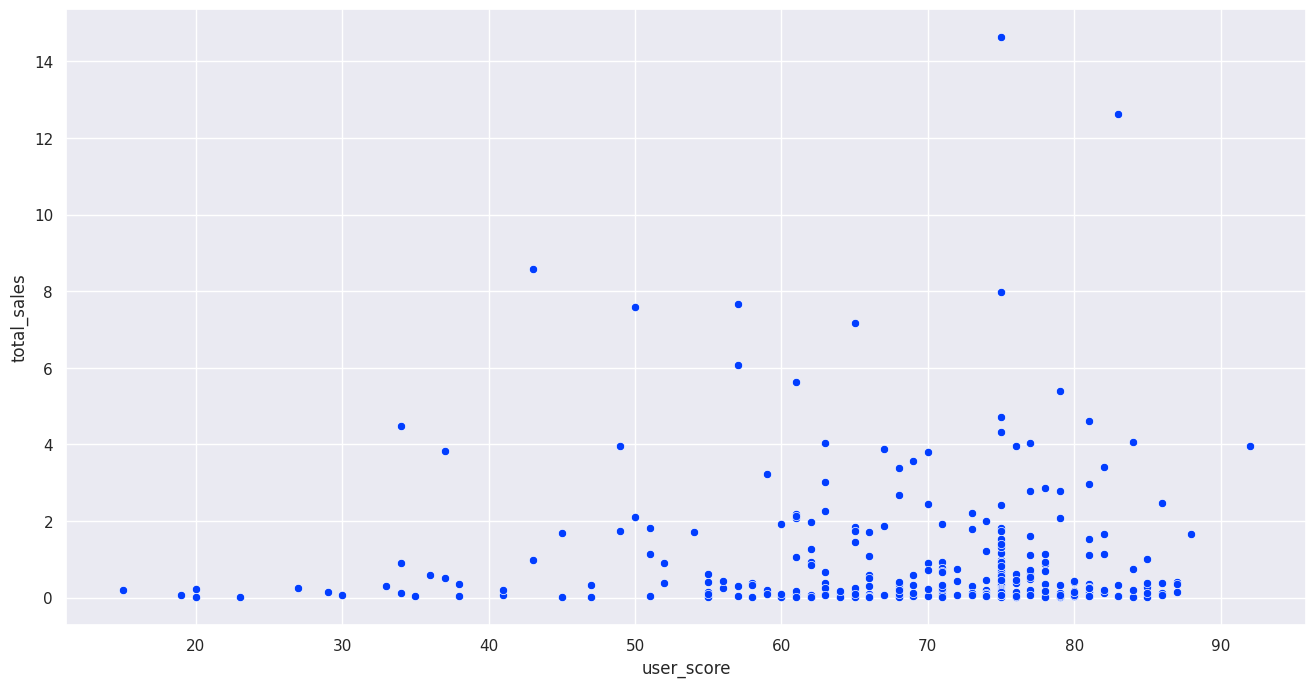

In [61]:
# Membuat scatterplot untuk masing-masing yang ditentukan
plt.figure(figsize = (16, 8))
sns.scatterplot(data=games_data_ps4_2011, x = 'user_score', y='total_sales' )

dapat dilihat melalui scatter plot bahwa hubungan total penjualan dengan `critic_score` memiliki hubungan yang sedikit linear sedangkan dengan `user_score` sangat tidak jelas terlihat pengaruhnya

**PLATFORM LAINNYA**

In [62]:
# Mengiris hanya untuk X360 untuk critic_score & user_score dengan nilai non null
games_data_x360_2011 = games_2011.groupby(['platform', 'name']).agg({
    'total_sales': 'sum',
    'critic_score': 'sum',
    'user_score': 'sum'
}).query('platform == "X360" & critic_score > 0 & user_score > 0').reset_index()
games_data_x360_2011

,platform,name,total_sales,critic_score,user_score
0,X360,2 in 1 Combo Pack: Sonic Heroes / Super Monkey...,0.11,71.0,75.0
1,X360,2014 FIFA World Cup Brazil,0.43,74.0,44.0
2,X360,Ace Combat: Assault Horizon,0.49,78.0,62.0
3,X360,Adventure Time: Explore the Dungeon Because I ...,0.08,71.0,75.0
4,X360,Adventure Time: Finn & Jake Investigations,0.09,71.0,75.0
...,...,...,...,...,...
493,X360,Zumba Fitness Core,0.05,77.0,67.0
494,X360,Zumba Fitness Rush,0.18,73.0,62.0
495,X360,[Prototype 2],0.79,74.0,70.0
496,X360,de Blob 2,0.15,77.0,75.0


In [63]:
# membuat korelasi untuk platform X360 dengan total_sales
games_data_x360_2011.corr()['total_sales']

total_sales     1.000000
critic_score    0.349131
user_score     -0.030884
Name: total_sales, dtype: float64

Korelasi antara `total_sales` dan `critic_score` adalah sekitar `0.349`, yang berarti ada hubungan positif antara keduanya. Ini menunjukkan bahwa ada kecenderungan bahwa game dengan skor kritikus yang lebih tinggi cenderung memiliki total penjualan yang lebih tinggi. Namun, nilai korelasinya tidak sangat tinggi, kemungkinan karna ada faktor lain yang ikut mempengaruhi penjualan selain `critic_score`

Korelasi antara `total_sales` dan `user_score` (skor pengguna) adalah sekitar `-0.03`, yang  menunjukkan hubungan negatif antara keduanya akan tetapi sangat kecil. Artinya, skor pengguna tidak terlalu berpengaruh terhadap penjualan.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

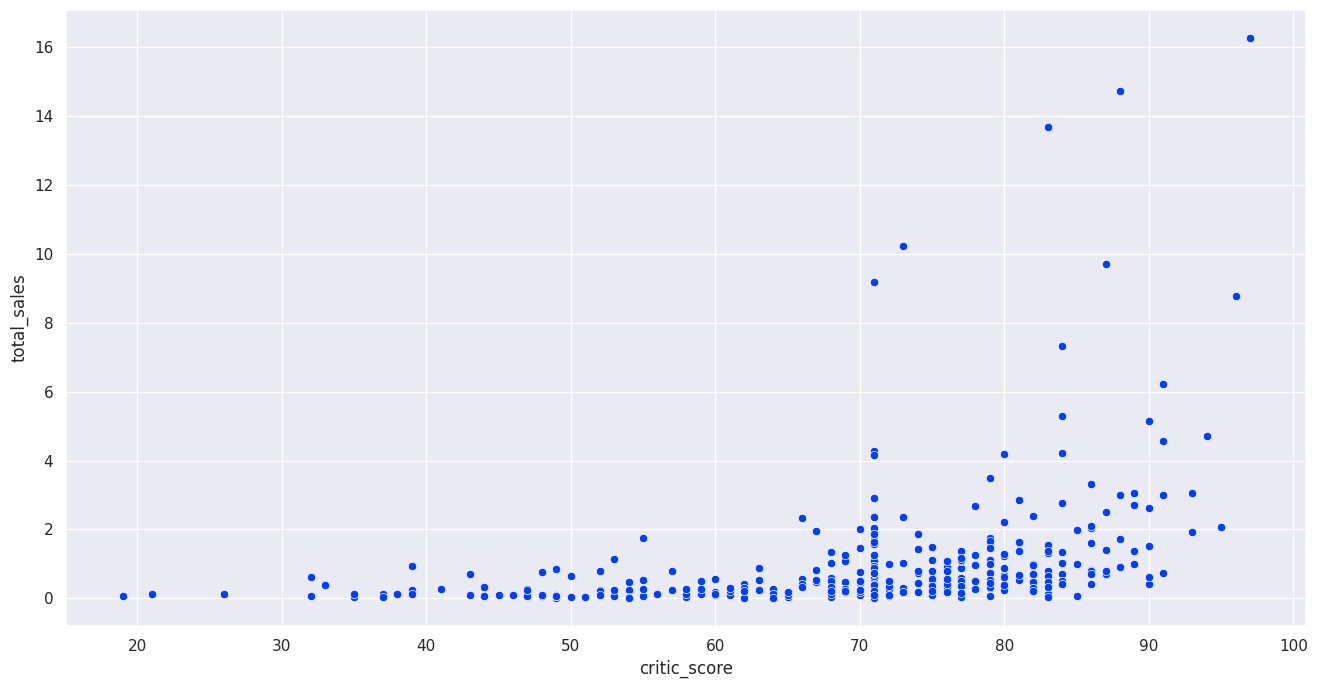

In [64]:
# Membuat scatterplot untuk masing-masing yang ditentukan
plt.figure(figsize = (16, 8))
sns.scatterplot(data=games_data_x360_2011, x = 'critic_score', y='total_sales' )

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

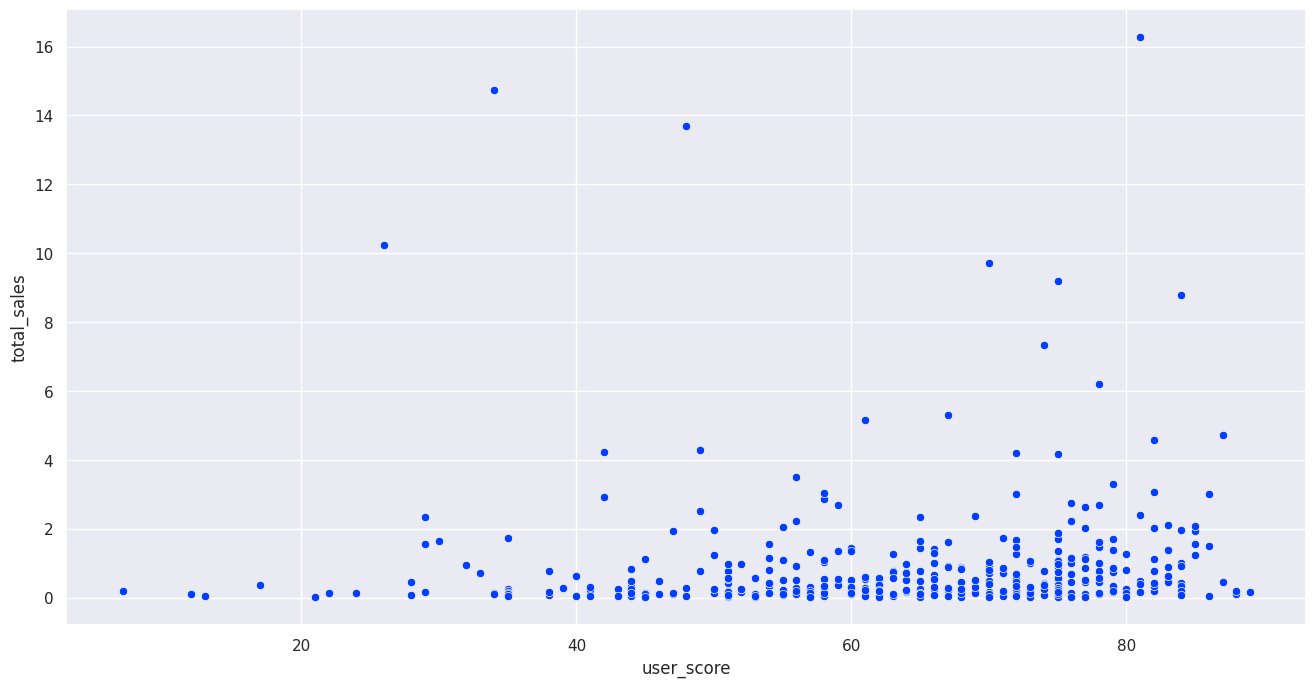

In [65]:
# Membuat scatterplot untuk masing-masing yang ditentukan
plt.figure(figsize = (16, 8))
sns.scatterplot(data=games_data_x360_2011, x = 'user_score', y='total_sales' )

dapat dilihat melalui scatter plot bahwa hubungan total penjualan dengan `critic_score` memiliki hubungan yang sedikit linear sedangkan dengan `user_score` sangat tidak jelas terlihat pengaruhnya

**Kesimpulan:** `user_score` tidak memiliki pengaruh significant terhadap penjualan sedangankan `critic_score` memiliki pengaruh walaupun tidak cukup besar.

### Mengamati distribusi umum game berdasarkan genre

Apa yang bisa kita simpulkan terkait genre yang paling menguntungkan? Bisakah kamu melakukan generalisasi terkait genre dengan penjualan yang tinggi dan rendah?

In [66]:
# Menganalisa distribusi paling tinggi pada genre
# Memeriksa distribusi genre dengan value_count

games_2011['genre'].value_counts()

Action          1269
Role-Playing     465
Adventure        410
Sports           389
Misc             375
Shooter          329
Racing           180
Fighting         159
Simulation       136
Platform         122
Strategy         117
Puzzle            71
Name: genre, dtype: int64

jumlah perilisan game terbanyak adalahn `Action`, `Role-Playing`, `Adventure`, `Sports`, dan `Misc`. dan terendah `Puzzle`

In [67]:
# Memeriksa lebih detail distribusi genre dengan agregasi kolom total_sales
# Menghitung total penjualan untuk setiap genre
genre_high_sales_2011 = games_2011.groupby('genre')['total_sales'].sum().reset_index()

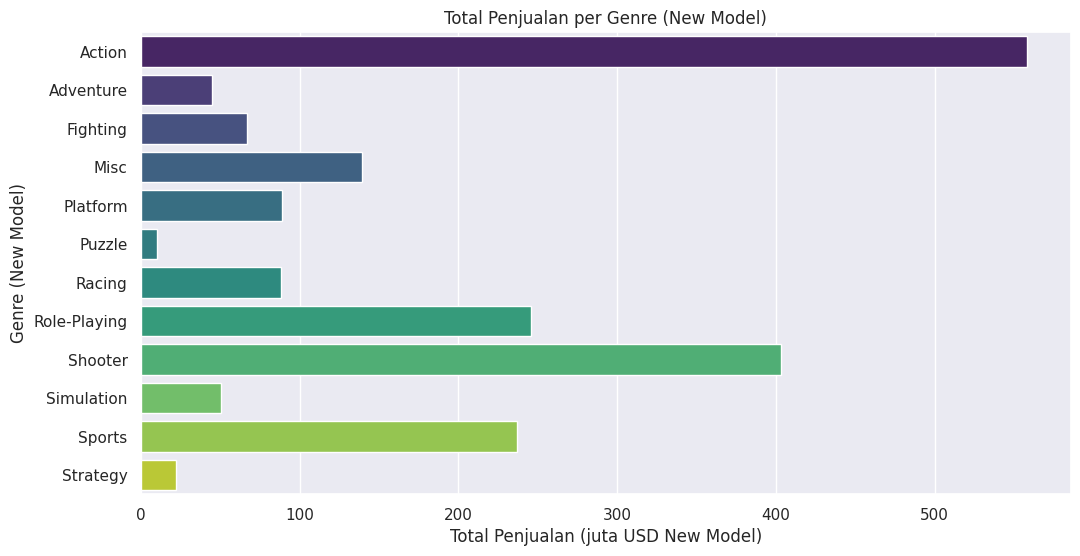

In [68]:
# Membuat bar plot visualisasi penjualan untuk platform
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='genre', data=genre_high_sales_2011, palette='viridis')
plt.title("Total Penjualan per Genre (New Model)")
plt.xlabel('Total Penjualan (juta USD New Model)')
plt.ylabel('Genre (New Model)')
plt.show()

dapat dilihat bahwa game dengan genre `Action` memiliki jumlah dan penjualan paling banyak, sedangkan game dengan genre `Shooter` memiliki penjualan terbanyak kedua, kemudian `Role-Playing`, `Sports` dan `Misc`. dengan penjualan terendah `Puzzle`.

In [69]:
# Menemukan genre dengan total penjualan terbesar
biggest_genre_2011 = genre_high_sales_2011[genre_high_sales_2011['total_sales'] == genre_high_sales_2011['total_sales'].max()]
print("Genre dengan total penjualan terbesar :")
biggest_genre_2011

Genre dengan total penjualan terbesar :


,genre,total_sales
0,Action,557.8


In [70]:
# Membuat distribusi genre terbesar untuk data new model
# Memilih data penjualan hanya untuk genre terbesar
data_biggest_genre_2011 = games_2011[games_2011['genre'] == biggest_genre_2011['genre'].values[0]]

# Membuat distribusi penjualan per tahun
genre_sales_per_year_2011 = data_biggest_genre_2011.groupby('year_of_release')['total_sales'].sum()

# Menampilkan distribusi penjualan
print("Distribusi penjualan per tahun untuk genre terbesar (New Model):")
genre_sales_per_year_2011


Distribusi penjualan per tahun untuk genre terbesar (New Model):


year_of_release
2011    116.68
2012    119.25
2013    122.51
2014     97.23
2015     72.02
2016     30.11
Name: total_sales, dtype: float64

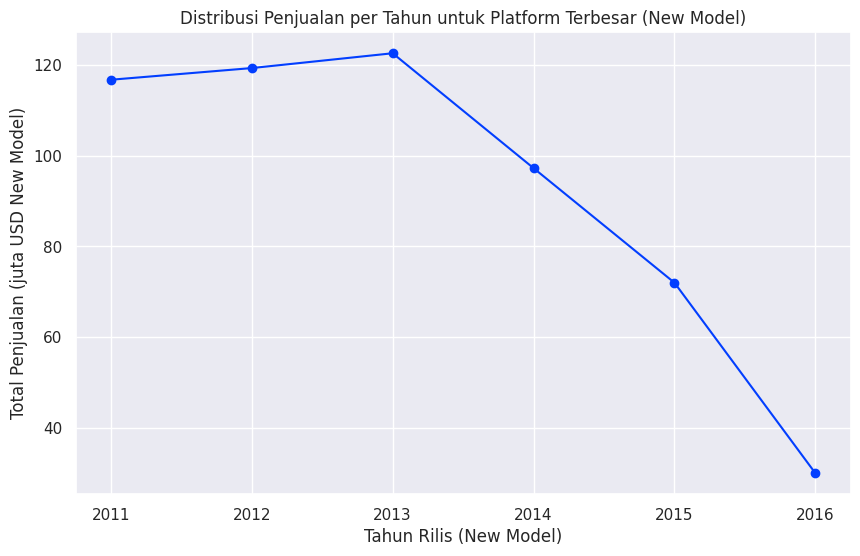

In [71]:
# Data distribusi penjualan per tahun
genre_year_2011 = genre_sales_per_year_2011.index
genre_sales_2011 = genre_sales_per_year_2011.values

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(genre_year_2011, genre_sales_2011, marker='o', linestyle='-')
plt.title('Distribusi Penjualan per Tahun untuk Platform Terbesar (New Model)')
plt.xlabel('Tahun Rilis (New Model)')
plt.ylabel('Total Penjualan (juta USD New Model)')
plt.grid(True)
plt.show()


dapat dilihat bahwa penjualan genre `Action` mencapai puncak tertinggi pada tahun 2013 kemudian mulai menurun setelah tahun tersebut.

Sekarang kita akan melihat bagaimana dengan genre dengan penjualan terendah

In [72]:
# Memeriksa lebih detail distribusi genre dengan agregasi kolom total_sales (genre dengan nilai terendah)
# Menghitung total penjualan untuk setiap genre
lowest_sales_genre_2011 = games_2011.groupby('genre')['total_sales'].sum().reset_index()

In [73]:
# Menemukan genre dengan total penjualan terendah
lowest_genre_2011 = lowest_sales_genre_2011[lowest_sales_genre_2011['total_sales'] == lowest_sales_genre_2011['total_sales'].min()]
print("Genre dengan total penjualan terendah :")
lowest_genre_2011

Genre dengan total penjualan terendah :


,genre,total_sales
5,Puzzle,9.85


In [74]:
# Membuat distribusi genre terendah untuk data new model
# Memilih data penjualan hanya untuk genre terbesar
lowest_genre_data_2011 = games_2011[games_2011['genre'] == lowest_genre_2011['genre'].values[0]]

# Membuat distribusi penjualan per tahun
lowest_sales_genre_per_year_2011 = lowest_genre_data_2011.groupby('year_of_release')['total_sales'].sum()

# Menampilkan distribusi penjualan
print("Distribusi penjualan per tahun untuk genre terendah (New Model):")
lowest_sales_genre_per_year_2011


Distribusi penjualan per tahun untuk genre terendah (New Model):


year_of_release
2011    4.96
2012    1.72
2013    0.96
2014    1.49
2015    0.71
2016    0.01
Name: total_sales, dtype: float64

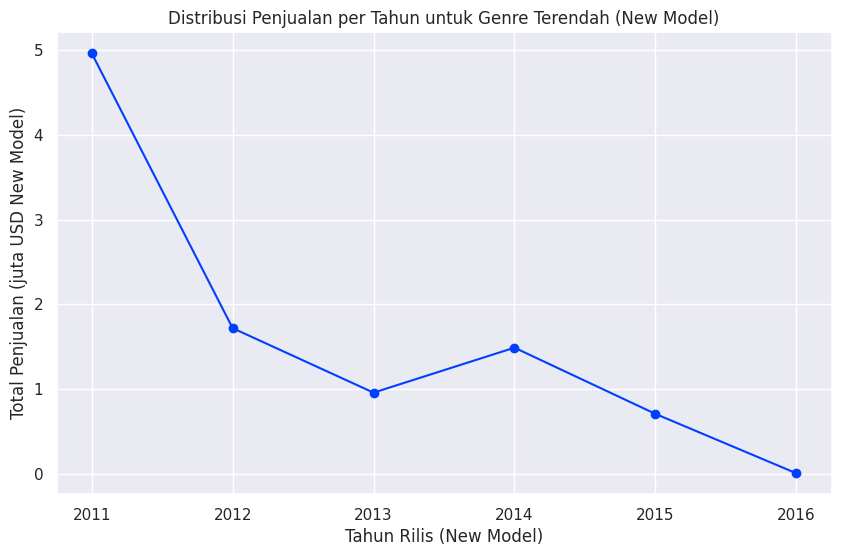

In [75]:
# Data distribusi penjualan per tahun
genre_lowest_year_2011 = lowest_sales_genre_per_year_2011.index
genre_lowest_sales_2011 = lowest_sales_genre_per_year_2011.values

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(genre_lowest_year_2011, genre_lowest_sales_2011, marker='o', linestyle='-')
plt.title('Distribusi Penjualan per Tahun untuk Genre Terendah (New Model)')
plt.xlabel('Tahun Rilis (New Model)')
plt.ylabel('Total Penjualan (juta USD New Model)')
plt.grid(True)
plt.show()

penjualan untuk game dengan genre `Puzzle` memiliki sedikit peminat dapat dilihat bahwa penjualan tertinggi terdapat pada tahun 2011 sedangkan setelah itu terus mengalami penurunan, meskipun sempat terjadi kenaikan pad atahun 2014 tapi itu tidak terlalu besar sehingga tidak terlalu mempengaruhi total pnejualan secara keseluruhan.

**Kesimpulan:** baik itu genre game dengan penjualan tertinggi `Action` maupun penjualan terendah `Puzzle` tetap mengalami penurunan penjualan setelah tahun 2014.

## Melakukan Pemrofilan Pengguna<a id='profile'></a>

Untuk setiap wilayah NA, EU, JP tentukan:

1. 5 platform teratas, dan menjelaskan variasi pangsa pasar dari satu wilayah ke wilayah lainnya.
2. 5 genre teratasm dan jelaskan perbedaannya.
3. Apakah rating `ESRB` memengaruhi penjualan di masing-masing wilayah?


In [76]:
# Memeriksa platform berdasarkan total_sales
games_2011.groupby('platform')['total_sales'].sum().sort_values().reset_index()

,platform,total_sales
0,PS2,0.45
1,PSP,29.01
2,DS,38.73
3,PSV,53.81
4,WiiU,82.19
5,Wii,95.02
6,PC,97.68
7,XOne,159.32
8,3DS,257.81
9,PS4,314.14


In [77]:
# Mengagregasikan dan mengelompokan platform berdasarkan wilayah yang ditentukan
sales_sector_platform = games_2011.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
sales_sector2_platform = games_2011.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
sales_sector2_platform['total_sales'] = sales_sector2_platform[['na_sales', 'eu_sales', 'jp_sales']].sum(axis = 1)
sales_sector2_platform

,platform,na_sales,eu_sales,jp_sales,total_sales
0,3DS,82.65,61.27,100.62,244.54
1,DS,18.86,9.24,8.04,36.14
2,PC,29.88,56.70,0.00,86.58
3,PS2,0.13,0.13,0.09,0.35
4,PS3,168.26,163.10,49.39,380.75
5,PS4,108.74,141.09,15.96,265.79
6,PSP,2.19,1.77,24.04,28.00
7,PSV,12.47,13.07,21.84,47.38
8,Wii,48.56,29.60,8.97,87.13
9,WiiU,38.10,25.13,13.01,76.24


<Figure size 2000x800 with 0 Axes>

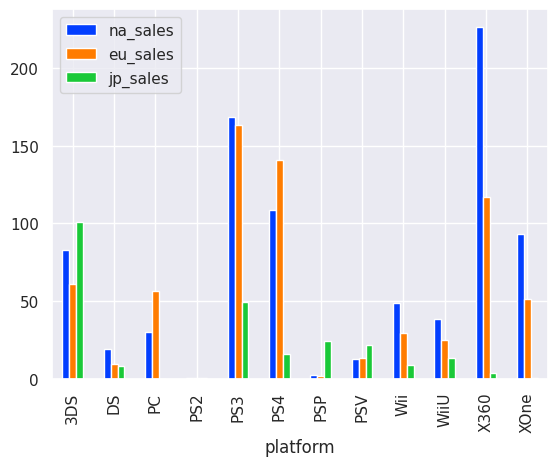

In [78]:
plt.figure(figsize=(20,8))
sales_sector_platform.plot(kind = 'bar');

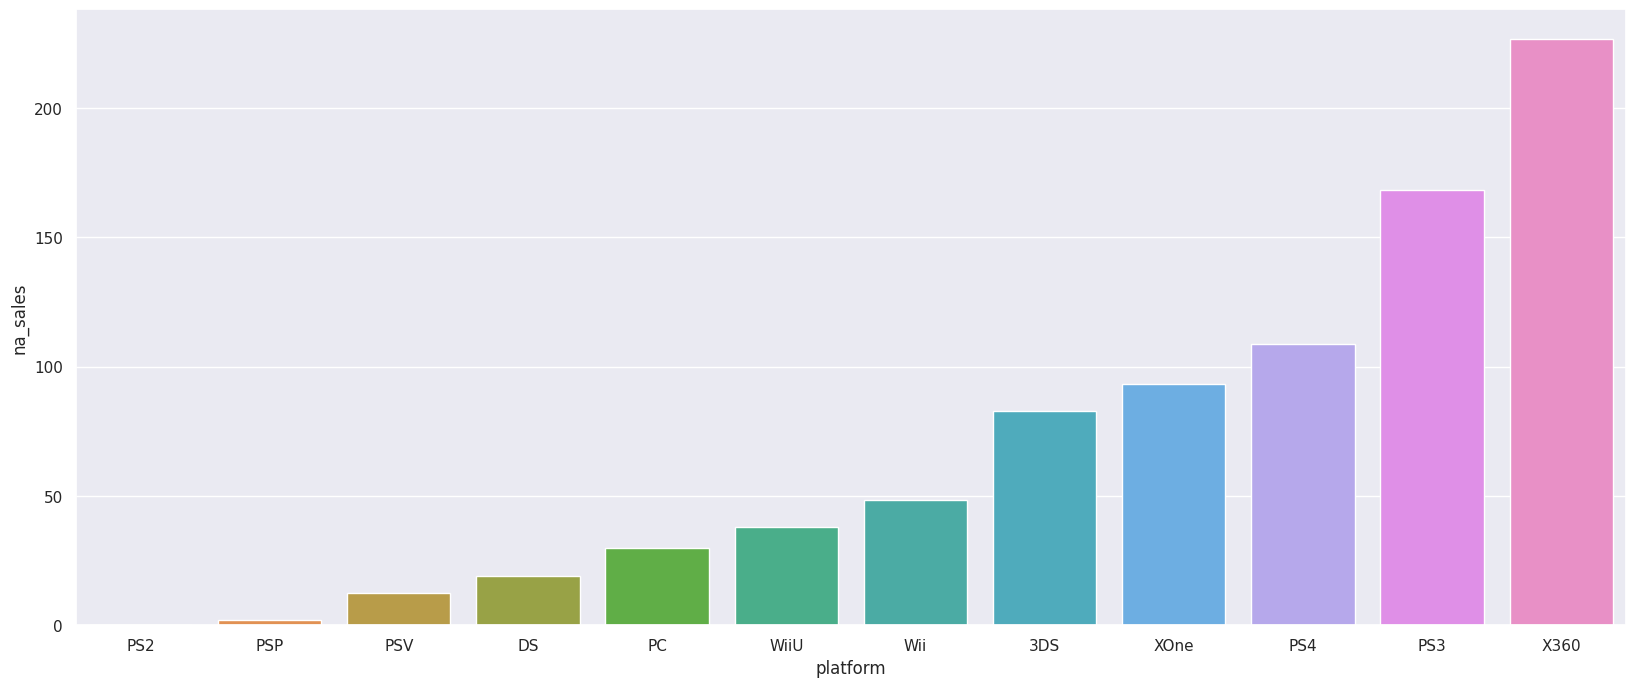

In [79]:
plt.figure(figsize=(20,8))
sns.barplot(data = sales_sector2_platform.sort_values(by='na_sales'), x = 'platform', y = 'na_sales' );

platform dengan penjualan tertinggi `NA_sales` adalah `X360`, `PS3`, `PS4`, `XOne`, dan `3DS`

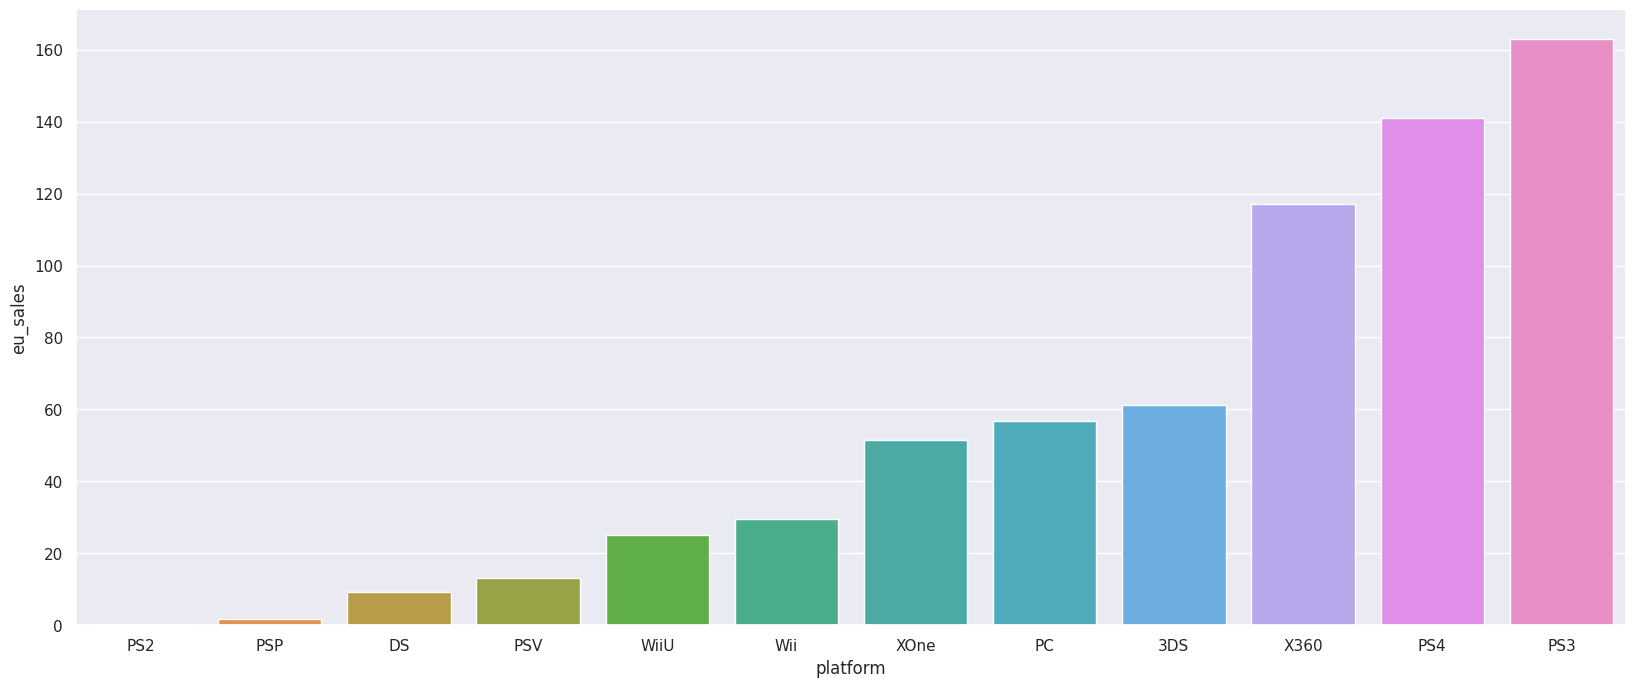

In [80]:
plt.figure(figsize=(20,8))
sns.barplot(data = sales_sector2_platform.sort_values(by='eu_sales'), x = 'platform', y = 'eu_sales' );

platform dengan penjualan tertinggi `EU_sales` adalah `PS3`, `PS4`, `X360`, `3DS`, dan `PC`

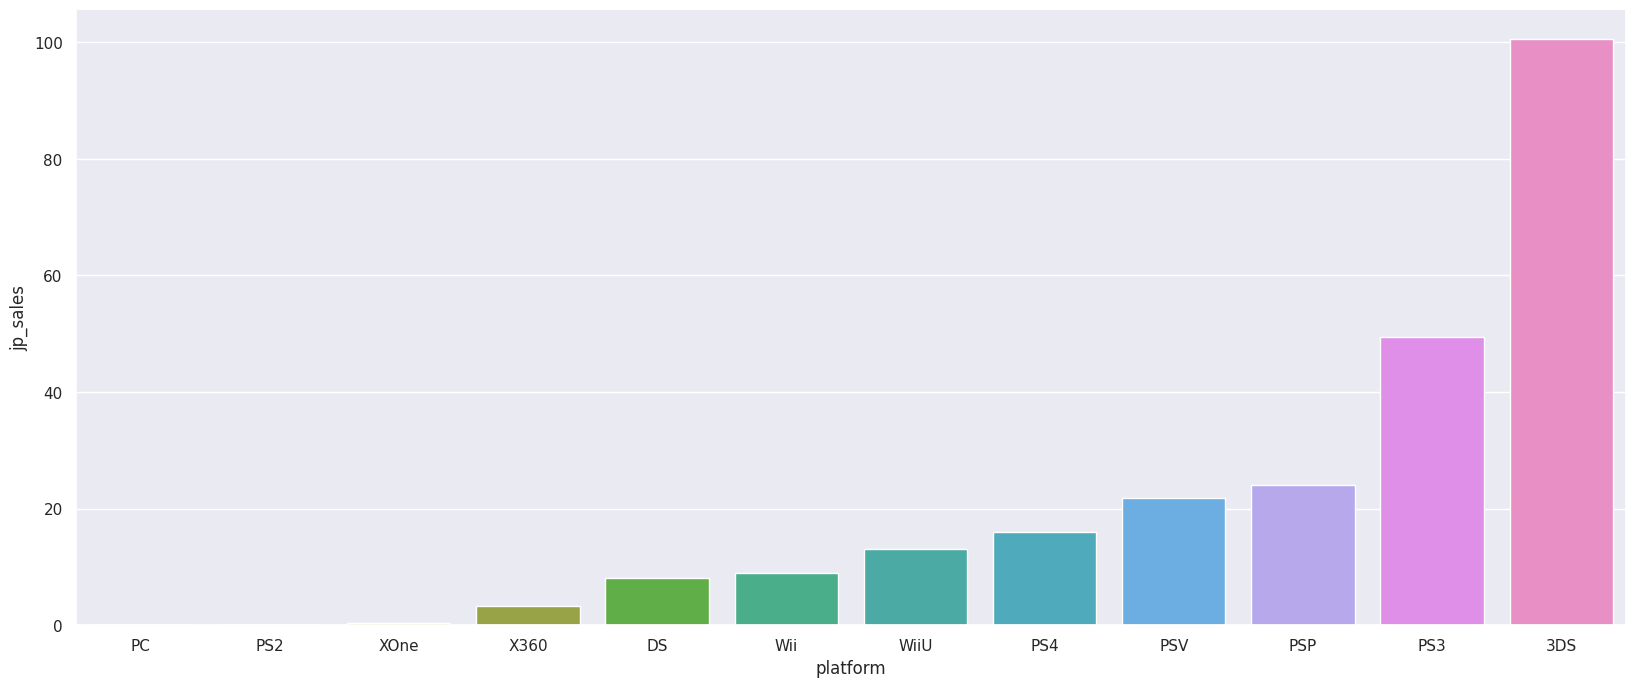

In [81]:
plt.figure(figsize=(20,8))
sns.barplot(data = sales_sector2_platform.sort_values(by='jp_sales'), x = 'platform', y = 'jp_sales' );

platform dengan penjualan tertinggi `JP_sales` adalah `3DS`, `PS3`, `PSP`, `PSV`, dan `PS4`

**Kesimpulan:** masing-masing daerah memiliki kecenderungan platform yg berbeda-beda, akan tetapi `3DS`, `PS3` dan `PS4` selalu masuk dalam 5 besar

### Menghitung 5 Genre teratas

In [82]:
# Mengagregasikan dan mengelompokan genre berdasarkan wilayah yang ditentukan
genre_sales_sector = games_2011.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
genre_sales_sector2 = games_2011.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
genre_sales_sector2['total_sales'] = genre_sales_sector2[['na_sales', 'eu_sales', 'jp_sales']].sum(axis = 1)
genre_sales_sector2

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,230.92,199.12,63.62,493.66
1,Adventure,14.76,13.96,12.07,40.79
2,Fighting,31.63,16.24,12.38,60.25
3,Misc,69.69,39.72,17.60,127.01
4,Platform,38.28,30.07,12.13,80.48
5,Puzzle,2.74,3.56,2.91,9.21
6,Racing,31.98,40.58,5.64,78.20
7,Role-Playing,83.78,62.30,79.87,225.95
8,Shooter,194.43,148.02,11.92,354.37
9,Simulation,15.37,19.72,11.64,46.73


<Figure size 2000x800 with 0 Axes>

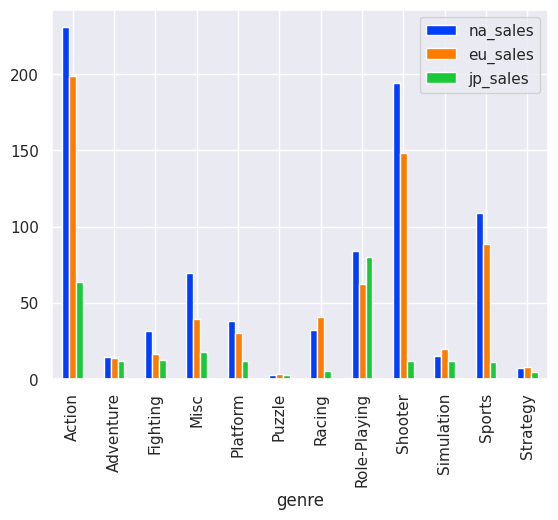

In [83]:
plt.figure(figsize=(20,8))
genre_sales_sector.plot(kind = 'bar');

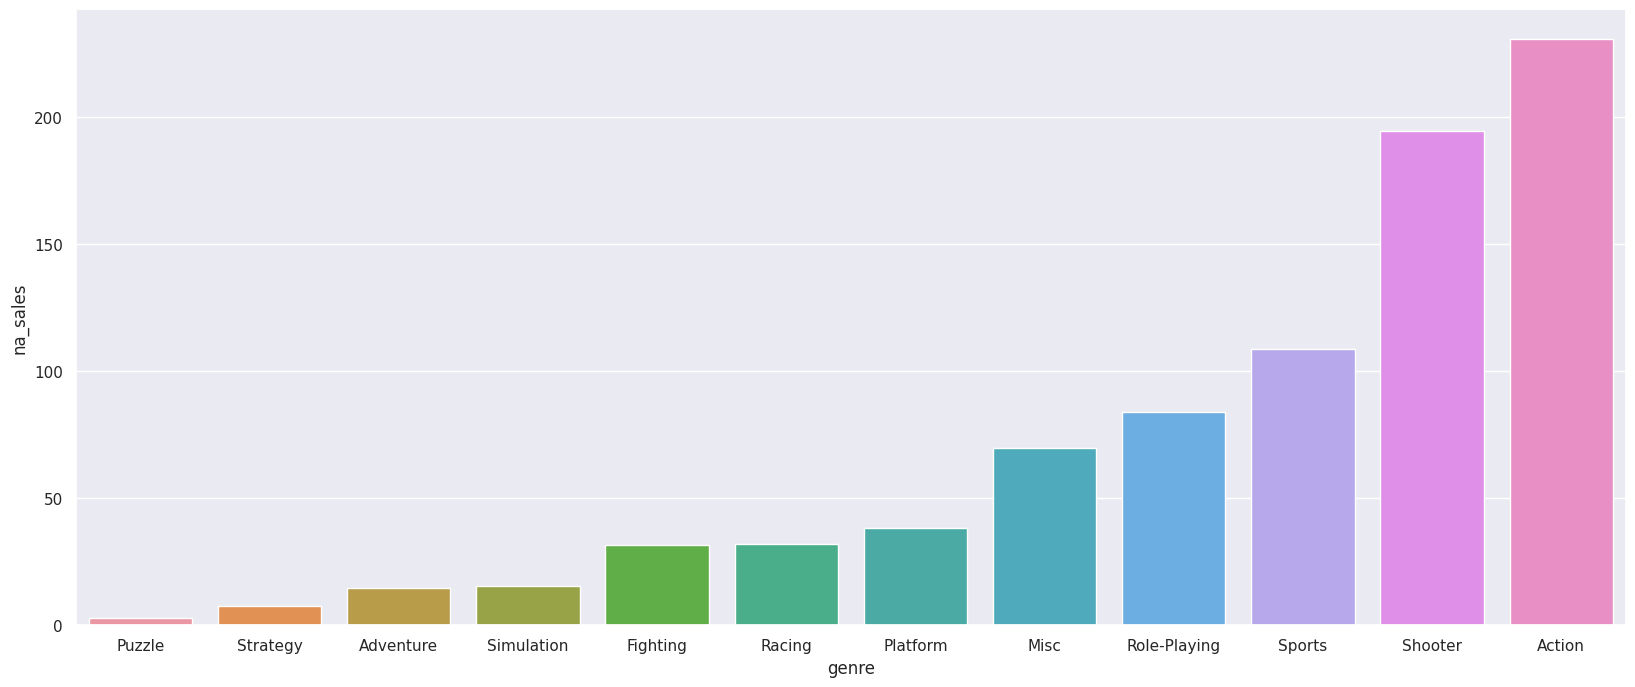

In [84]:
plt.figure(figsize=(20,8))
sns.barplot(data = genre_sales_sector2.sort_values(by='na_sales'), x = 'genre', y = 'na_sales' );

genre dengan penjualan tertinggi `NA_sales` adalah `Action`, `Shooter`, `Sports`, `Role-Playing`, dan `Misc`

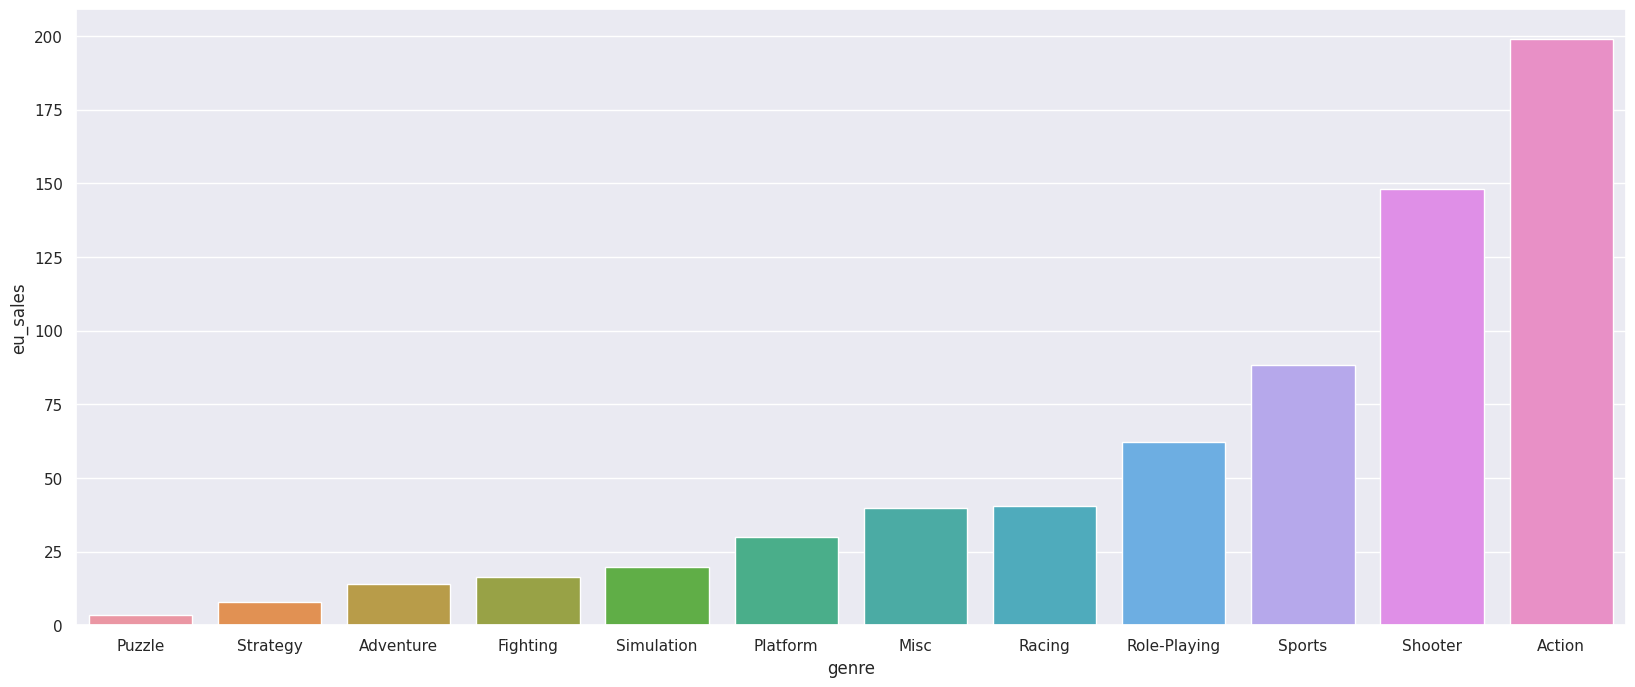

In [85]:
plt.figure(figsize=(20,8))
sns.barplot(data = genre_sales_sector2.sort_values(by='eu_sales'), x = 'genre', y = 'eu_sales' );

genre dengan penjualan tertinggi `EU_sales` adalah `Action`, `Shooter`, `Sports`, `Role-Playing`, dan `Racing`

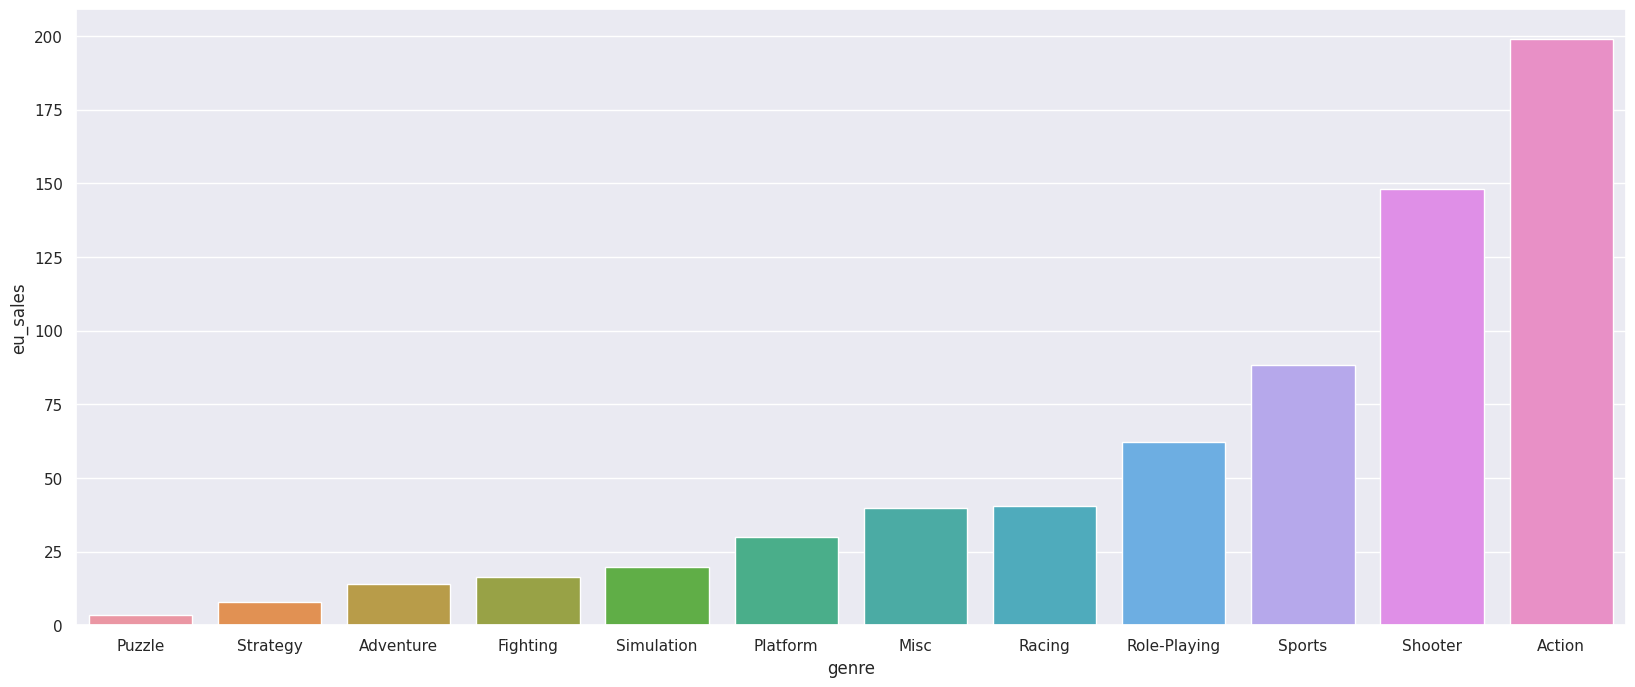

In [86]:
plt.figure(figsize=(20,8))
sns.barplot(data = genre_sales_sector2.sort_values(by='eu_sales'), x = 'genre', y = 'eu_sales' );

genre dengan penjualan tertinggi `JP_sales` adalah `Action`, `Shooter`, `Sports`, `Role-Playing`, dan `Racing`

**Kesimpulan:** meskipun dari daerah berbeda-beda kencenderungan untuk  genre hampir sama yaitu `Action`, `Shooter`, `Sports`, dan `Role-Playing` hanya berbeda untuk `Racing` pada `JP_sales` dan `EU_sales` menempati peringkat kelima sedangkan pada `NA_Sales` peringkat kelimanya adalah `Misc`

## Hipotesis <a id='hypothesis'></a>

### Rata- Rata Rating Pengguna Platform Xbox One dan PC

- <font color='blue'>H0 : Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA.</font>
- <font color='red'>H1 : Rata-rata rating pengguna platform Xbox One dan PC adalah TIDAK SAMA.</font>

`Alpha : 0.05`

In [87]:
# Memeriksa value
games_2011['platform'].value_counts()

PS3     708
3DS     512
X360    498
PSV     429
PS4     392
PC      389
PSP     312
XOne    247
Wii     197
DS      184
WiiU    147
PS2       7
Name: platform, dtype: int64

In [88]:
# Memfilter kolom yang akan digunakan untuk hipotesis
games_data_2011_pc = games_2011[(games_2011['platform'] == 'PC') & (games_2011['user_score'])]
games_data_2011_xone = games_2011[(games_2011['platform'] == 'XOne') & (games_2011['user_score'])]

In [89]:
xone_user_ratings = games_2011[games_2011['platform'] == 'XOne']['user_score']
pc_user_ratings = games_2011[games_2011['platform'] == 'PC']['user_score']

print('XBox One user ratings variance:', np.var(xone_user_ratings).round(2))
print('PC user ratings variance:', np.var(pc_user_ratings).round(2))

XBox One user ratings variance: 158.31
PC user ratings variance: 222.51


In [90]:
from scipy.stats import levene
# Melakukan uji Levene
stat, p_value = levene(xone_user_ratings, pc_user_ratings)

# Output hasil uji Levene
print(f"Levene's test statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretasi hasil
if p_value < 0.05:
    print("Varians antar kelompok berbeda secara signifikan (menolak H0).")
else:
    print("Tidak ada perbedaan signifikan dalam varians antar kelompok (gagal menolak H0).")

Levene's test statistic: 4.358943999024171
P-value: 0.03721369305667955
Varians antar kelompok berbeda secara signifikan (menolak H0).


berdasarkan uji hipotesis untuk platform Xbox One dan PC ialah menolak H0 bahwasannya rata - rata rating pengguna platfom Xbox One dan PC tidak sama.

### Rata-rata rating pengguna genre Action dan Sports berbeda

- <font color='blue'>H0 : Rata-rata rating pengguna genre Action dan Sports TIDAK SAMA.</font>
- <font color='red'>H1 : Rata-rata rating pengguna genre Action dan Sports SAMA.</font>

Alpha : `0.05`

In [91]:
# Memfilter kolom yang akan digunakan untuk hipotesis
games_data_2011_action = games_2011[(games_2011['genre'] == 'Action') & (games_2011['user_score'])]
games_data_2011_sports = games_2011[(games_2011['genre'] == 'Sports') & (games_2011['user_score'])]

In [92]:
action_user_ratings = games_2011[games_2011['genre'] == 'Action']['user_score']
sports_user_ratings = games_2011[games_2011['genre'] == 'Sports']['user_score']

print('User ratings of Action genre variance:', np.var(action_user_ratings).round(2))
print('User ratings of Sports genre variance:', np.var(sports_user_ratings).round(2))

User ratings of Action genre variance: 107.74
User ratings of Sports genre variance: 261.04


In [93]:

# Melakukan uji Levene
stat, p_value = levene(action_user_ratings, sports_user_ratings)

# Output hasil uji Levene
print(f"Levene's test statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretasi hasil
if p_value < 0.05:
    print("Varians antar kelompok berbeda secara signifikan (menolak H0).")
else:
    print("Tidak ada perbedaan signifikan dalam varians antar kelompok (gagal menolak H0).")

Levene's test statistic: 114.42394935672671
P-value: 7.200849104731275e-26
Varians antar kelompok berbeda secara signifikan (menolak H0).


berdasarkan uji hipotesis untuk genre action dan sport ialah menolak H0 bahwasannya rata - rata rating pengguna platfom action dan sport tidak sama.

## Kesimpulan<a id='conclusion'></a>

1. Peluncuran game setiap tahun berbeda-beda akan tetapi mencapai puncak pada tahun 2006-2009 kemungkinan karna saat itu perkembangan internet dan komputer sangat pesat sehingga peminat game sangat banyak.
2. Beberapa game mencapai penjualan tertingginya pada tahun 2006-2010 namun setelah itu banyak yang kemudian meredup popularitasnya
3. platform `PS3` memiliki popularitas tertinggi pada awal tahun 2000an akan tetapi mulai meredup pada tahun 2010 akhir kemudian popularitasnya digantikan oleh `PS4`
4. platform `X360` mulai kehilangan popularitas pada tahun 2011 kemudian digantikan oleh `XOne` akan tetapi popularitas `XOne` masih belum dapat menyamai popularitas `X360`
5. `user_score` ternyata tidak terlalu mempengaruhi tinggi rendahnya penjualan karena memiliki korelasi yang sangat kecil terhadap penjualan, akan tetapi `critic_score` mempengaruhi meskipun tidak terlalu memiliki dampak yang besar.
6. game dengan genre paling populer adalah `Action` genre tersebut juga memiliki penjualan tertinggi diantara genre lainnya.
7. platform dengan penjualan tertinggi menurut `Na_sales`, `Eu_sales` dan `JP_sales` masing-masing daerah memiliki kecenderungan platform yg berbeda-beda, akan tetapi `3DS`, `PS3` dan `PS4` selalu masuk dalam 5 besar
8. penjualan tertinggi untuk  genre hampir sama yaitu `Action`, `Shooter`, `Sports`, dan `Role-Playing` hanya berbeda untuk `Racing` pada `JP_sales` dan `EU_sales` menempati peringkat kelima sedangkan pada `NA_Sales` peringkat kelimanya adalah `Misc`
9. hipotesis menyimpulkan bahwa rata - rata rating pengguna platfom Xbox One dan PC tidak sama dan rata - rata rating pengguna platfom action dan sport tidak sama.

### Temuan<a id='end'></a>

1. untuk menangani nilai hilang pada `critic_score` dan `user_score` dapat menggunakan median untuk mempermudah analisa data, sedangkan untuk `rating` dapat diabaikan karna tidak mempengaruhi analisa data
2. data sebelumnya dipangkat menjadi hanya dari tahun 2000 saja untuk mengisi data yang hilang, sedangkan untuk membuat pemodelan tahun 2017 digunakan data dari tahun 2011 untuk mempermudah analisa.
3. untuk mengisi `user_score` yang memiliki nilai `tbd` harus diubah dulu menjadi `Nan` untuk mempermudah mengganti tipe datanya dan mengisi data yang hilang
4. `year_of_release` lebih direkomendasikan menggunakan int karna hanya berisi data tahun

### Rekomendasi<a id='recom'></a>

1. platform yang kemungkinan masih akan populer pada tahun selanjutnya ada `PS4` karna melihat dari data tahun sebelumnya platform ini masih memiliki banyak peminat, serta `X360` meskipun mulai meredup popularitas platform ini pada tahun sebelumnya sangatlah tinggi, jika `X360` merilis game pada tahun 2017 dengan mengedepankan 'nostalgia' pengguna kemungkinan platform ini akan mencapai masa kejayaannya lagi.
2. genre yang paling diminati, paling banyak dirilis dan paling besar penjualannya adalah `action` jadi untuk tahun selanjutnya sangat direkomendasikan untuk mengembangkan genre ini. serta perlu diperhitungkan genre `Shooter` karna genre ini tidak memiliki cukup banyak perilisan akan tetapi termasuk dalam 2 besar penjualan tertinggi.

[Kembali](#back)